In [1]:
# Imports 

import math
import random
import matplotlib.pyplot as plt

In [2]:
# Config 

rho_max = 0.2
tp_max = 14
tp_min = 2
N = 60
p = 60

BW = 125
PL = 30
CR = 1

TP_SET = [2,5,8,11,14]
SF_SET = [7,8,9,10,11,12]
CH_SET = ['868.1','868.3','868.5']

In [3]:
def toa (sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds

def rho_compute(sf,n) : 
    return (toa(sf,CR,PL,BW)*n)/p

def reward_function(rho,u_ch,tp):
    return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))


In [4]:
rewards = []
tx = 14
for sf in SF_SET:
    rho = rho_compute(sf,10)
    rewards.append(reward_function(rho,20,tx))
    if tx >= 5:
        tx = tx -3
    else:
        tx = 2
print(rewards)

[0.8340747330960854, 0.7362551867219918, 0.7651300904977376, 0.8825650452488688, 1.0662825226244343, 1.0364388992537314]


In [5]:
def action_space_generator():
    action_space = []
    for sf in SF_SET:
        for tp in TP_SET:
            for ch in CH_SET:
                action_space.append([sf,tp,ch])
    return action_space 

In [6]:
import gym
import numpy as np
env = gym.make('Taxi-v3')

# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

P = {
        state: {action: [] for action in range(action_space.n)}
        for state in range(obs_space.n)
    }
#print(P)

The observation space: Discrete(500)
The action space: Discrete(6)


In [7]:
from gym import spaces
action_space = spaces.Box( np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
print(action_space.sample())
print(action_space.shape)


[11  2  2]
(3,)


/home/mhamnache/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [8]:
import gym
from gym import spaces
N = 100

class LoraWANEnv (gym.Env):
    
    def __init__(self):
        self.action_space = spaces.Box(np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
        self.observation_space = spaces.Box(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]), np.array([N,N,N,N,N,N,N,N,N,N,N,N,N,N]),dtype =np.int)
    
    
    def toa (self,sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds


    def rho_compute(self,sf,n) : 
        return (self.toa(sf,CR,PL,BW)*n)/p

    def reward_function(self,rho,u_ch,tp):
        return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))
    
    def reset(self):
        pass
    
    def step(self, action):
        assert self.action_space.contains(action)
        
        return observation, reward, done, info
    
    def render(self):
        pass
    
    def close(self):
        pass
        

env =LoraWANEnv()
print(env.observation_space.shape)
print(env.action_space.sample())
print(type(env.observation_space))



(14,)
[ 7 11  1]
<class 'gym.spaces.box.Box'>


/home/mhamnache/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/mhamnache/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

In [9]:
action_space = spaces.Box( low=5,high =10, shape =(5,),dtype =np.int)
print(action_space.sample())


[9 6 6 8 8]


/home/mhamnache/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [10]:
from gym import spaces
space = spaces.Tuple((
  spaces.Discrete(5),
  spaces.Discrete(4),
  spaces.Box(low=0, high=1, shape=(2, 2))))
print(space.sample())
print(space.shape)

(2, 0, array([[0.5239745 , 0.12366768],
       [0.7608293 , 0.7970035 ]], dtype=float32))
None


In [68]:
def reward_plot(rewards):
    plt.plot(rewards)
    plt.ylabel('Cummulative Reward')
    plt.xlabel('Episodes')
    plt.savefig('reward.png')
    plt.show()



In [12]:
rewards = [71.930546851005, 59.49383308079349, 67.43589861431441, 60.614995062683064, 59.18535498635602, 58.77294409279129, 61.10061994227983, 57.26791248749176, 55.848272384853466, 50.84118613264099, 59.999066159392555, 58.805417115243245, 72.75128549293764, 67.52791799905924, 52.56139453991911, 55.815344748682136, 70.73318858359283, 56.23373844482128, 61.581781610899554, 57.27277320684334, 54.00928558930313, 50.89900702991427, 63.19622650033104, 56.32603277588835, 57.09775731328877, 53.032302623942286, 62.4054536657725, 49.59351932850882, 47.563380907047936, 47.54501532785921, 44.014642108533096, 44.13485370405868, 54.884315928169464, 47.41066832367264, 44.36129941078698, 47.61230293886052, 42.87481899649825, 46.8738731827977, 36.03129574718212, 46.99988820646764, 42.21497347488039, 45.90237293857377, 58.29632518348316, 44.78707648245005, 43.4662017129244, 47.902490987797364, 35.34186267285164, 39.226782392013284, 24.068531895729755, 38.99505179439209, 41.236718440125195, 33.184486033014835, 46.07650026794135, 35.647900013763795, 41.07072822593484, 39.25497468750705, 35.475170403552575, 50.496313054999376, 36.29838814878177, 35.025417479318776, 38.25562291749173, 32.65570324689929, 38.570452299923645, 40.84217500209744, 55.05902440308139, 36.970404212721135, 38.36517243263322, 28.977289839608403, 24.37062678994635, 35.63858805484875, 33.314921575991924, 43.90130785562952, 36.20756778937641, 41.79041207985293, 29.151974183077563, 24.605646793800876, 37.439207639818484, 36.08335656368345, 28.835398096065795, 32.894288522314135, 30.370718029502317, 28.79615651510504, 25.502500061255926, 33.916407808383646, 27.7968243116973, 39.629065874699656, 26.563512748878264, 29.37356467344657, 29.308599838207563, 29.817644777357604, 30.511700364381383, 33.15056538620637, 25.988698661333252, 23.5646792738955, 29.742768177706125, 25.020843662748593, 31.062768118763458, 25.343677008777348, 26.24677993527178, 27.048474355122444, 25.803379014731952, 35.122600580945026, 27.101542145169713, 20.658488684510907, 32.57386138466809, 24.29149097424902, 23.802517679535725, 17.126328664118834, 31.65418359623582, 22.457665133441797, 30.691236909824426, 21.29091069177511, 27.092276955256853, 20.832329000101602, 32.51885012382241, 20.274785879668933, 20.701350757895312, 31.235036713736502, 20.881298497288284, 34.87761947752715, 24.16006980741363, 22.15076012778179, 26.776177718489972, 16.210777709029355, 19.963891330987458, 18.90176530732977, 26.01315704678143, 20.59318779275527, 18.0484572385535, 22.11633518115903, 21.294080990036427, 22.316915636061633, 13.77365871091704, 24.160065273876103, 11.816393919632851, 16.490771115493132, 20.40122624547123, 18.072224110594924, 22.216393227545346, 24.362924680452334, 17.777776363835873, 21.72904445075841, 17.665570361295888, 22.45488475506866, 20.563059143115797, 19.567894801569473, 19.853902178518364, 13.126861929816597, 14.881123904852611, 20.33461846654971, 26.229297632024704, 14.556291751870187, 14.712859001325063, 11.744028805427341, 18.479543835396075, 25.780160707547303, 16.334225078045268, 13.667688730552532, 15.008908866087845, 11.542161257203835, 16.621065641885586, 12.957672890294752, 14.392673772053673, 9.091943828590958, 19.998137783954792, 11.169281977399363, 16.558002059242263, 18.262917388460718, 15.277286937380282, 12.829757449395018, 20.67407954784141, 11.724290638806906, 15.807550574153986, 10.292956899109567, 16.67262243672429, 12.812127667010632, 14.673724746268883, 12.70536579141736, 14.951766482745622, 7.721835909338622, 16.914492672325572, 12.242831706854368, 12.288999384730552, 15.122991077542586, 15.647737598283616, 12.443701713563842, 12.715392782107447, 8.206543198634913, 9.348557803315204, 15.818974229787077, 12.643888335668409, 13.292491070585502, 10.398185418611474, 12.290544394555447, 7.051169808638574, 6.848118270351634, 10.453201028905948, 11.702712283088427, 15.53824419104183, 9.137846019443671, 20.83894764521822, 8.579825795456108, 12.975040591816914, 9.90424260102358, 12.738238137445414, 9.492598274861571, 9.354834938216921, 7.411996159084157, 11.104540252393644, 16.1559909282044, 10.616591693345269, 8.790793401452532, 9.047669006078848, 6.771103146106371, 15.318584098868094, 14.704239031173435, 8.461343430524472, 12.868424411988215, 8.72762443545847, 12.004046002843848, 14.798875356995364, 12.394852493708715, 10.330693576410809, 7.474531207232432, 13.33506443449682, 9.452264398482441, 11.839640447819669, 10.09339138127676, 10.281862866157171, 11.527819026326226, 8.305647587998006, 12.563924569720458, 8.382903116307531, 16.751336531119108, 8.71400527047865, 12.152492771139993, 12.686848040435319, 10.888941997335822, 15.088937296062202, 9.982786190121965, 11.190896717946176, 7.389576631091692, 12.649821090122483, 16.183590085195387, 10.309769919460411, 11.442857210345014, 11.855605310165567, 15.404783574464174, 9.073809794932382, 8.453449309201696, 11.13624071173839, 9.160295102457974, 12.750303123665052, 12.327010199252202, 9.764470942501259, 6.127891363062425, 17.03019595359491, 10.669602026398037, 9.832516376067282, 8.849814754428577, 10.939094376961638, 13.416062401283142, 4.111350587637787, 10.339373541833648, 8.059311174893296, 7.886011721104717, 8.298089826016033, 6.725791893053923, 8.43424154962631, 14.183048452414324, 7.264239148733733, 10.530720306144113, 6.16112076986355, 7.584546926984741, 8.1586690551013, 11.836381168863145, 7.56019400334949, 5.2204941042624, 8.411500232543789, 6.399685074397455, 12.679639171588324, 8.922929375476691, 13.115639810325652, 9.808968727456346, 8.80359179256675, 10.333757333029718, 12.53300797157198, 10.768434457672555, 15.291657008281973, 9.829715219602267, 12.125089872519183, 8.064134902765725, 8.208849239447988, 8.796578155082402, 11.751195501113278, 12.796290901402461, 8.352451962192415, 13.215282657057545, 10.960952322876356, 10.941628662284943]

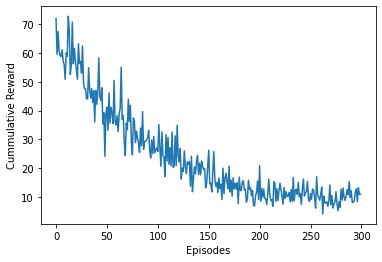

In [13]:
reward_plot(rewards)

In [14]:
rewards2 = [57.80349762275458, 61.461659338044115, 60.593202158087095, 63.96547453236482, 71.8265226994146, 65.65961801208698, 72.97965510526345, 52.686904038858586, 64.20981103552603, 57.78114106328493, 55.871883422523695, 74.51430226492366, 45.11503888560542, 58.408306962443106, 66.32294981978146, 55.646199594605775, 52.81810264650316, 54.619523380785644, 50.77004061957122, 54.86628532454782, 71.49013773329324, 67.5146081072258, 52.55541500138608, 57.99431109830996, 55.603122216071434, 62.732608779258626, 59.58501718853718, 48.69980063777615, 52.182748026552126, 61.6663302622026, 52.273522663211025, 58.722156623533984, 50.0123880625478, 51.62925836961715, 62.46797952342934, 48.6402863258727, 55.54814600668428, 55.02221507690258, 54.99824704435995, 55.07840844037964, 54.73947867631828, 51.687365937629025, 51.29645281699945, 54.72716260389421, 56.400568888483065, 64.13871800152944, 55.26096781785088, 40.34966078952821, 59.38617874061521, 48.16004935015112, 63.403884972903285, 60.700625790894165, 46.232838057669575, 50.52656399817132, 54.92047756733305, 37.46067123116434, 44.35722817942828, 48.708018596797835, 48.71076929219439, 45.636810685332144, 46.29847314283984, 38.19314072680656, 44.0014423158688, 47.52163455028055, 40.992249021734835, 54.974361614298836, 47.535149237256995, 37.56909382528872, 44.5541978484487, 45.51747296772673, 43.37465085110438, 46.947056318359486, 41.54866564032658, 48.77716576578171, 44.1046677553062, 50.74877329803458, 44.443830591973054, 45.01821697441171, 50.580210281377084, 38.03449057934919, 45.71986985360759, 47.41576434211562, 51.61646464020493, 38.62264580422523, 41.2537579139811, 39.715266322737776, 44.13356862377342, 45.18797218312114, 48.08837751578487, 44.166206215161836, 47.16856309908001, 42.47153601433113, 38.92282035876125, 53.50408414293501, 44.9703334731426, 41.599190800016956, 43.48588365567718, 40.16991414631757, 47.9829054715108, 33.75581007398233, 39.05656252913845, 43.404353642213486, 41.10817147855199, 46.53065236399099, 36.196426265262765, 36.47552752943392, 46.23357305055768, 42.93709451370992, 39.23974890355229, 43.76896975849831, 41.040478865787364, 33.75694154745454, 43.3395506074638, 40.27640167975008, 38.27497126672622, 41.66010032748375, 49.00536292212986, 34.03268675096616, 39.23770369098157, 40.12232167709445, 37.32428561265798, 42.36864384981583, 44.38957241527102, 38.358214169296176, 49.34224446916214, 36.29384678354951, 38.333574831149555, 35.54086334186184, 31.54688561490473, 37.21162847114143, 45.484136258553505, 43.171113767109006, 39.28742863874723, 39.62352979890114, 36.81242863554787, 32.969838715506896, 36.83753789978581, 36.04671426538235, 40.07239711896779, 31.206402720421657, 33.098093973835695, 40.11943200316947, 40.88472266045367, 40.30590425977452, 33.86966480070359, 36.758184776596195, 42.5097728625246, 38.43871081284683, 37.03756001968667, 29.2024030906381, 37.01208274451915, 32.74714210758322, 34.38189419759141, 39.08042387320757, 37.46356003600438, 34.61955457279424, 35.49336044821014, 34.07973077430497, 37.294721549578675, 37.909740795900895, 38.36892734785817, 32.53435276008201, 34.964560264704275, 41.898040025536766, 30.92441247907848, 29.530145299706362, 35.79998646942906, 32.74480684308086, 40.44291730833325, 40.11383052169228, 32.10898937966205, 34.31832662545377, 29.434943802916518, 34.69146121620518, 39.17248249199672, 32.35708216140922, 31.989670693595606, 29.550805376015795, 32.38318579678323, 32.88912613737073, 33.19243636679328, 37.90246772159134, 34.61900816481675, 29.732567839727675, 30.71945582259486, 36.4104695606705, 32.42953390815523, 34.744985720287495, 36.7934438244939, 33.22427779567403, 33.3048388318613, 37.38560343969534, 27.991669509702135, 30.127095606060305, 27.433324116650084, 27.18349147467004, 32.615886749415594, 30.672859481199158, 38.10038236328681, 30.24363337515915, 30.179779719621504, 29.609482333033508, 30.384246610944686, 30.30269885243443, 33.64294392773303, 37.672637471417396, 33.863821310892625, 30.67731649132883, 36.202534161349895, 38.32113862798134, 33.32800968870192, 33.87337063333217, 32.58937624034769, 32.317215825343496, 34.444621650292326, 32.99581234824941, 35.34102222302849, 32.73032279246882, 33.30717560812187, 31.818278200226867, 35.722173692443235, 34.48306686909621, 34.74568486412109, 31.169001315249613, 32.908077130443544, 34.83831075361312, 29.27932975261178, 34.8734666386912, 27.924297588667656, 27.8428544255633, 32.063288270755535, 32.110315907483844, 32.06681106553502, 34.240474125320404, 31.307442615665632, 29.158895809626465, 32.83623824005852, 33.228994548507394, 31.429338133967633, 27.84382662794366, 28.90517893274648, 26.77138337532203, 29.328548429261605, 30.95806508778007, 29.31350295678118, 30.730982629952216, 28.72454313390746, 31.94838031499058, 28.582008959945306, 30.104169796038292, 29.482844694655693, 27.16977471727348, 29.78251974813786, 26.502007396551363, 28.604101349400203, 34.61426625403881, 28.535212072793218, 30.53819785517306, 31.494668087439862, 34.6673306031675, 29.62264615294945, 29.51558934724389, 26.59704881452728, 29.80226660108088, 30.80409294033296, 33.265986678738784, 28.469278928824995, 31.152091073942394, 27.754196885543518, 29.86517508590601, 33.25110369459166, 29.196024982856134, 29.9407595585153, 29.480998095883937, 28.55951017921393, 26.609222839362687, 32.20127478853223, 30.703228846574532, 28.48549791253622, 29.60428191707349, 30.4797529332644, 27.17275576745416, 32.391188992482554, 27.230795329621223, 30.82020326088645, 29.405720246912836, 30.8309633741381, 31.993780548206182, 29.523580737546137, 31.623403379791014, 31.227324174106293, 34.169989463038206, 30.989694884771296, 31.94580898974022, 30.325892751331036, 32.484147862728854, 33.612725941661964, 33.737976877147986, 33.13145163681999, 31.69210231160787]

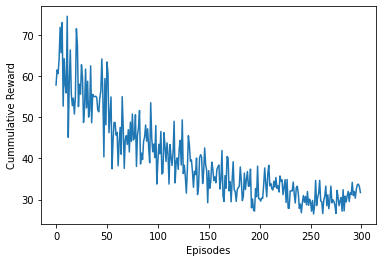

In [15]:
reward_plot(rewards2)

In [16]:
reward_10 = [1048.3314004197657, 1785.3304067548859, 2117.212119951192, 1574.395340894694, 1447.6101969287488, 1916.0008016861923, 2286.719754365024, 1786.6508044019672, 1847.3940978772441, 1662.172365200479, 1398.2358045787423, 1723.0013949518404, 2214.4688896509806, 1434.00313798742, 2034.3941098973794, 1723.8071741895628, 1734.284445803788, 1326.7096814816314, 1797.2033101537158, 1604.3771699790036, 1277.9582768069704, 1585.543626007249, 1386.6964109946878, 1205.646646236074, 1829.7367989992915, 1847.6541454226688, 1304.8762707030808, 1369.7161006652634, 1546.9105042061003, 1239.671796624933, 1841.5325395353607, 1002.9489504274359, 1429.8348907867462, 1533.945369391803, 1558.0615238450598, 1613.8122333137424, 1237.0360671211934, 1758.5406106141832, 1541.2195173132425, 1073.79202892726, 1599.423105033208, 1751.7012174419954, 1524.5165961195073, 1671.0193695770063, 1572.9482747136785, 1531.3414997476775, 1042.5291411932271, 1864.3356045302837, 1897.608742863952, 1601.4196495651183, 1220.892540875118, 1150.052263988308, 690.572242487149, 1231.2095401670115, 925.0530464868681, 1283.9847523017052, 1806.657214449576, 1625.6182790151902, 1068.6640036643664, 1293.5717979932267, 1090.2024276383327, 1312.996162035616, 1343.1904707134445, 1552.240679971385, 1463.0803713322737, 1576.45641310002, 1131.1629145149934, 907.562288855065, 1036.3208264318241, 1465.7923951086273, 1475.2438418414577, 1376.7513812142713, 1437.8835138365023, 1048.950298629985, 2056.066329619338, 1224.5975508128145, 1154.2120421780646, 1340.0796109034318, 1594.9140656662873, 1165.1161794967645, 1097.8628073838397, 1561.5760428021574, 1440.710332884777, 1386.0459247220715, 957.7513823614847, 825.4688123978805, 1107.1994480994117, 1126.7007845329658, 903.7610320148447, 1070.0636242428286, 959.777549517666, 989.6657310024525, 940.3159167506303, 1245.1257034690843, 1193.7425708234707, 1035.7562343809727, 1107.9604898547525, 1053.6343482752718, 714.0925201764425, 765.0575013933637, 1984.6946478587192, 2837.2301236827584, 1430.8997112580307, 1120.6820044862156, 1122.5212851921729, 1184.795667007145, 1845.8909390465947, 1353.0876412588723, 1120.056855481678, 614.5517611398366, 916.6992110345603, 835.7116120097188, 1329.440010096062, 1124.3374912964564, 1026.8184206756716, 1283.0292688061245, 858.1718845525756, 554.2021898526908, 947.6201300633079, 1322.9185469104598, 1493.2231644824515, 1352.4987974846779, 1759.1849831389686, 1069.7645047524436, 888.7280137540599, 969.5135427606087, 1298.2773206439958, 1238.7763814383286, 797.7131783034479, 533.8866355747224, 831.8339114710205, 787.6628792646356, 927.0306345607319, 1082.345975124575, 760.3172666052719, 1568.865270051288, 945.5913941911721, 1275.2223018123698, 1068.9307188830337, 872.1566797420686, 1235.8416988723166, 2034.3223353117958, 1035.432361454354, 814.9237147938973, 1061.2890647513645, 1065.7796487649641, 616.644024306262, 1105.8466731452227, 904.4651400929434, 839.7731207906801, 1531.255985286325, 907.3791687745206, 1030.8016177979646, 1141.4660361697559, 1532.8659940152254, 982.5700499492741, 592.3000099157916, 598.8008580533098, 931.6594090696435, 910.2107211537868, 687.4263675654643, 751.4516603829406, 850.2564873833794, 720.1834634256064, 1038.9591949116298, 705.9817620396306, 1179.9545730294594, 1575.3027660831021, 1085.9488687187297, 1044.1142351012018, 1115.1183568519343, 1730.6667177506629, 1074.8589115385378, 596.9006675826183, 1310.3596011510435, 783.5668998642293, 1178.8704920844414, 1156.7643269880434, 869.2773365767058, 450.35117146194534, 461.9800672818649, 895.9431256242242, 1254.7417387281164, 636.0748994528511, 941.972547800483, 1995.9919376258633, 1902.5921968326895, 1295.231941481818, 674.6578238413346, 678.9020289861752, 596.9782554309974, 407.7841601874668, 714.4360683318757, 793.2878389800927, 973.3621745977358, 803.3779132269493, 2108.684367901331, 437.8347654952096, 659.6804685140029, 899.1227139894415, 834.631766225433, 760.4087853302398, 924.3109953460645, 1489.8139787891412, 885.6672442816902, 890.842685405222, 792.4360252693108, 771.4720395827638, 694.3438687346691, 768.2295221277717, 850.2016061913382, 1360.7013027041276, 768.5395273472036, 397.89500282364736, 452.87450172376657, 1338.403264875423, 886.2789427098315, 822.3611485136524, 920.466634841932, 394.4140602997504, 1000.8987381735194, 598.2547890734444, 388.9642251131218, 538.4802564670124, 465.8472381292121, 1468.8218186686454, 1682.7323111970602, 449.8217080603755, 607.4400646869616, 916.4269242896427, 928.4615964750498, 1567.633784805572, 1081.089758000146, 761.175699947671, 635.6709774919354, 721.8576460360322, 1779.0434860519158, 355.3589147077592, 1276.6044884846865, 859.6756459346423, 635.0280945470838, 583.2639222114874, 1100.3150343703162, 837.0527418551227, 667.9937387931749, 1421.6211384967262, 1019.6472499985913, 988.3310508756016, 863.2514934238905, 969.2247562934812, 706.8047339986094, 735.1229846194262, 646.880640560165, 1046.9891985929169, 1158.284943579813, 375.76297149884437, 725.0841626778724, 737.7216391533716, 550.5793156671391, 1027.5312121327377, 386.81839692319096, 888.6285129354349, 1098.3401400229275, 1083.3786494612586, 1612.0632350599506, 1271.6646209204569, 2306.5679557880812, 1379.0985429451603, 723.3623532507137, 720.3439611493267, 456.5281702113485, 550.3842228337946, 792.95410590197, 716.8155110312551, 318.3331260209155, 845.1131974940884, 375.3645361990944, 664.1065411746979, 1114.8139743876152, 861.1835849313431, 738.5456851540216, 824.3565836646941, 815.1325935499752, 1286.1255521564954, 885.7536383938591, 804.3468422408653, 777.445652042638, 679.7060237556558, 849.2051260245385, 660.1421273396929, 648.6865298365584, 987.4180342630722, 1287.460512631414, 947.2124655000832, 571.8283371040719, 967.613102663064, 1336.2680067137155, 1796.3861708144775, 1783.8102223014944, 1208.506435520926]

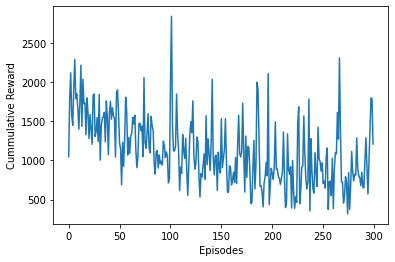

In [17]:
reward_plot(reward_10)

In [18]:
reward_1000 = [48.60116534075603, 47.82427408183706, 39.98692666227021, 39.464536021440345, 37.41622009167997, 46.4216457059959, 34.42454910463067, 44.93226075136983, 41.421123010650895, 44.17515649233532, 39.898942680267155, 44.41353029704107, 31.17670515619195, 34.671287289900164, 30.17427061750539, 37.174074176952914, 33.92162463733034, 33.65156570987266, 43.17344026390162, 34.43601902706153, 33.39261328235157, 36.42584325810544, 33.65669464507413, 50.16146488396826, 34.663287584955754, 33.67136701098794, 32.16203568273434, 32.89465651597883, 35.902193752943624, 39.65946737592702, 35.179016904508515, 39.16008256666947, 37.19742506143049, 38.16625500148019, 36.659232704269684, 29.907855388046883, 28.92605745690917, 28.86774876721377, 27.877565613176, 29.399472930818963, 34.194005361059546, 34.1503953170706, 31.634683618662603, 33.6394869489523, 25.906519748053483, 29.894937325031215, 25.408431701277713, 27.92867365783939, 20.63990237422045, 21.380570648071846, 23.90149475518663, 25.632165907366915, 27.144673284436124, 21.849660041392287, 18.105715277497435, 27.940298439644376, 19.84472145901209, 23.85444138497248, 28.39211497666813, 26.119726686796284, 18.384229682163905, 17.14542487808712, 20.395179697194042, 29.399378165667105, 27.61825384676351, 24.635282179094794, 16.623046838979942, 18.112101145356938, 25.381482328528858, 21.866839545640786, 21.930518593367832, 23.62386047070588, 29.43659996823229, 23.651595439265456, 19.367887668863766, 16.118955156914993, 20.879977498830854, 21.845953627236224, 16.375724486403296, 16.638228642902813, 21.412045405469545, 21.629866061005746, 20.13080122987241, 18.89450224367712, 26.866977643574177, 22.111855595056394, 18.3581623289871, 17.846406712484836, 16.830684639337086, 19.38199905253536, 16.84509106140386, 19.875377056182526, 16.35538206484612, 16.090519206461824, 15.350845143927465, 16.113162038384257, 19.873356843203524, 17.371027137693705, 13.116536680237488, 49.84429428107361, 13.605775749955983, 11.612814741227854, 53.582474736367296, 79.10630714454875, 66.8413837439739, 61.60400193089357, 66.10363400416607, 71.61639781412573, 76.84307441603113, 77.1087812142957, 78.84603407906522, 85.34067819298828, 74.10099203672704, 84.34165783642315, 67.84562716481943, 65.33555542335623, 65.11641366395833, 67.342164354582, 76.11353734809074, 74.09161538622445, 75.57843588623824, 68.81339610534812, 61.59708822278633, 62.35201230717417, 65.83618874652483, 70.83828484697216, 58.59903858276943, 66.59391237879964, 57.59039392097741, 76.83969159537921, 90.32801736736404, 82.10164147125008, 87.83879185396445, 46.33270594865178, 15.846818247570981, 9.597961015661888, 11.342518591766934, 50.073406243391545, 68.07586555173448, 64.84898050334644, 69.35171743078796, 65.8701388813217, 69.34663237665093, 63.582105273295596, 70.58969737428234, 65.08485999850666, 69.56678789641123, 68.57198443488281, 24.826158784981132, 7.581666580710426, 8.824374024398372, 7.554756772441223, 9.586282135092866, 6.823405601123628, 5.820990523373829, 4.577708695944444, 7.812069233813858, 9.072154176707937, 8.821149219152726, 8.573646513441792, 10.610023115284408, 14.841213777611081, 9.590111425931541, 8.59203838635708, 14.094182644618101, 9.314612774911389, 8.323012196480862, 4.572172780485873, 13.585953115750451, 7.326270525358739, 5.570082628809504, 7.3350552564206435, 11.081290952190853, 8.559003946896029, 13.336856011822684, 12.828647162230471, 8.07267361496291, 8.323711922595804, 5.052523356171223, 10.817645754950846, 10.08084899139052, 7.830342412946906, 2.3144324931550466, 8.061009706547418, 5.321759559836046, 6.063501866283789, 6.813068052065852, 8.575681310557174, 5.814926445205368, 8.831203506637616, 6.594390070869326, 9.574037034016241, 4.567957372010598, 4.062937396644057, 9.077881841736135, 3.064603490890418, 6.825457626042244, 6.5730940374326785, 6.309584252182001, 4.05665703234933, 6.818126680756963, 8.080089625450448, 4.824999668378226, 11.820847582042104, 7.3326856067701485, 8.0860688420724, 10.820854454828382, 5.582759597272028, 3.052385657411437, 6.0818904879881135, 6.559044948599925, 6.81490096551038, 5.313594969315933, 6.057111172985219, 5.837053129857794, 8.058248106234911, 4.319216046488852, 5.569296192639571, 3.0705880983863567, 4.3085369897258525, 3.813718001739793, 2.806303346432202, 6.819341978334337, 6.8139955988516325, 4.0614710279568085, 3.5626044921140703, 6.0645662938364, 5.305164330572235, 4.317123415268698, 6.056139186154224, 0.5494810223241042, 3.815920700389194, 4.053638074844459, 42.79349867734668, 2.8116870137943244, 2.304498150894324, 6.072364022006201, 5.560996440062143, 5.553961401298195, 3.046460893288017, 1.817566618746853, 5.808814458499158, 5.051527005419844, 1.0606644800873968, 4.294524965967967, 2.309294005133552, 1.3108461344434534, 6.5563885058347555, 3.315980845670949, 5.0671453208057, 2.8017402328608787, 3.305415486668303, 5.810593152808944, 1.044464892057929, 4.047401942723727, 5.31879643341875, 2.817198337542792, 4.552359202861656, 7.809485614638358, 10.081165413231483, 3.54638558882599, 4.566964398559586, 3.5509250400495906, 2.299434969579403, 10.473567188175656, 26.91513034249398, 26.89566358012377, 23.904870248794712, 28.900692252404802, 25.384506956339457, 27.380220024504037, 2.916758974412842, 2.0518020086128965, 4.801850745892625, 0.5483794531181777, 23.973009239399218, 18.66452664126105, 1.5520350245084444, 6.3037749253218385, 5.912216936492229, 36.2830442065434, 34.06354414783519, 23.88474904993772, 30.114515972530302, 26.159523250095866, 27.141478475044387, 26.886667261380577, 26.87961375606813, 29.394409202102395, 27.412080751319877, 20.005802712927398, 7.424964612583672, 8.31697628974767, 28.351824664437004, 2.5542084042445983, 1.043867546648111, 20.330866725242878, 26.846661904553503, 26.08692346147554, 25.840880626905697]

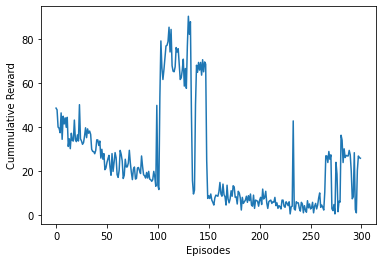

In [19]:
reward_plot(reward_1000)

In [20]:
rewards_der_10 = [16.45850622406639, 0.25, 0.75, 22.99199288256228, 0.75, 33.41701244813278, 14.006504524886877, -1, 7.378252262443438, 22.61134163208852, 3.945889894419306, 0.25, 35.35067873303167, 0.5, 2.4594174208144794, 18.675339366515836, 24.562759336099585, 3.1651119402985075, 0.5, 11.355203619909501, 3.6651119402985075, 2.2075559701492535, 5.3026018099547505, -1, 13.256504524886877, -1, 3.6438899253731343, 18.425339366515836, 11.783559577677224, 1.0, 8.837669683257918, 8.837669683257918, 1.8219449626865671, 65.08402489626556, 6.878252262443438, -1, 106.55203619909501, 6.878252262443438, 3.564126131221719, 0.75, 5.168834841628959, 17.675339366515836, 49.62551867219917, 5.3026018099547505, 12.033559577677224, 8.837669683257918, 48.87551867219917, 7.3201357466063355, 13.256504524886877, 0.25, 5.3026018099547505, 0.75, 9.337669683257918, 14.006504524886877, 14.006504524886877, 7.570135746606335, 18.425339366515836, 0.75, 18.425339366515836, 5.358519900497512, 4.143889925373134, 18.425339366515836, 18.425339366515836, 18.425339366515836, 18.425339366515836, 2.071944962686567, 27.263009049773753, 27.263009049773753, 27.263009049773753, 27.263009049773753, 1.9575559701492538, 0.75, 1.714629975124378, 48.41141331977631, 48.66141331977631, 27.263009049773753, 27.013009049773753, 33.16701244813278, 27.263009049773753, 5.800096961861668, 27.263009049773753, 27.263009049773753, 2.041111407249467, 27.263009049773753, 0.5, 0.75, 27.263009049773753, 98.25103734439834, 0.25, 1.0, 14.006504524886877, 14.006504524886877, 53.02601809954751, 7.378252262443438, 0.25, 7.378252262443438, 7.378252262443438, 7.628252262443438, 6.0526018099547505, 27.513009049773753, 9.587669683257918, 17.675339366515836, 48.87551867219917, 10.605203619909501, 10.605203619909501, 10.605203619909501, 1.0, 10.605203619909501, 2.4575559701492535, 21.210407239819002, 21.210407239819002, -1, 21.210407239819002, 1.464629975124378, 26.513009049773753, 26.513009049773753, 20.450207468879672, 5.418834841628959, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 21.210407239819002, 334.37989323843414, 26.513009049773753, 53.02601809954751, 1.714629975124378, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 0.5, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.378252262443438, 7.128252262443438, 13.256504524886877, 3.814126131221719, 13.256504524886877, 13.256504524886877, 98.00103734439834, 13.256504524886877, 13.256504524886877, 13.256504524886877, 13.256504524886877, 17.925339366515836, 13.756504524886877, 8.837669683257918, 8.837669683257918, -1, 8.837669683257918, 9.337669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.837669683257918, 8.287779850746269, 17.675339366515836, 38.900414937759344, 9.087669683257918, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 0.5, 4.668834841628959, 4.668834841628959, 4.668834841628959, 7.3201357466063355, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 0.5, 13.506504524886877, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 35.85067873303167, 11.783559577677224, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 4.668834841628959, 33.362989323843415, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 18.784994068801893, -1, 9.087669683257918, 4.03757272139625, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 6.141779788838612, 0.25, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918, 9.087669683257918]

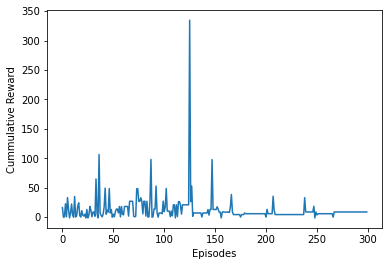

In [21]:
reward_plot(rewards_der_10)

In [22]:
reward = [22.99199288256228, -1, 0.75, 0.0, 54.02601809954751, 8.837669683257918, -1, 16.95850622406639, 0.25, -1, 16.70850622406639, -1, 41.95373665480427, 24.812759336099585, 111.45996441281137, 13.506504524886877, 27.013009049773753, 0.75, 0.25, 0.5, 6.391779788838612, 53.02601809954751, 5.418834841628959, 18.175339366515836, 0.25, 32.91701244813278, 4.668834841628959, 32.91701244813278, 4.143889925373134, 48.28234850915108, 25.062759336099585, -1, 13.466804979253112, 0.5, 37.86821266968325, 2.929259950248756, 5.143889925373134, 38.62554683539551, 27.013009049773753, 2.929259950248756, 747.910145671767, 65.58402489626556, 5.358519900497512, 13.506504524886877, 9.337669683257918, 64.83402489626556, 7.378252262443438, 48.62551867219917, 17.675339366515836, 27.263009049773753, 6.3026018099547505, 15.075559701492537, 4.143889925373134, 14.006504524886877, -1, 6.878252262443438, 20.450207468879672, 4.143889925373134, 1.0, 1.964629975124378, 321.3412956086799, 3.4151119402985075, 21.210407239819002, 3.4151119402985075, 26.513009049773753, 65.58402489626556, 20.200207468879672, 3.4151119402985075, 3.4151119402985075, 97.25103734439834, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 3.314126131221719, 2.2094174208144794, 17.70850622406639, 4.143889925373134, 2.2094174208144794, 113.96875265124618, 21.61134163208852, 21.61134163208852, 21.61134163208852, 1.0, 5.108519900497512, 30.34226026893541, 1.9575559701492538, 1.9575559701492538, 4.668834841628959, 788.195883422797, 318.2311328218348, 2.929259950248756, 2.929259950248756, 2.571944962686567, 1548.7543353797607, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, -1, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 1.9575559701492538, 21.960407239819002, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 1.714629975124378, 56.35498220640569, 33.41701244813278, 14.393005334914049, 0.5, 54.02601809954751, 2.929259950248756, 2.929259950248756, 9.087669683257918, 16.95850622406639, 2.929259950248756, 18.675339366515836, 14.575559701492537, 2.321944962686567, 67.22597864768683, 1.714629975124378, 4.668834841628959, 1.541111407249467, 1.541111407249467, 7.8251454427925005, 1.4109724813432836, 1.4109724813432836, 8.287779850746269, 189.63141414400124, -1, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 1.541111407249467, 23.830706659888154, 1.4109724813432836, 1.9109724813432836, 1122.5715457567528, 568.2307062765839, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 4.418834841628959, 6.141779788838612, 2.321944962686567, 2.321944962686567, 2.321944962686567, 2.321944962686567, 3.179259950248756, 1362.5560669437775, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 2.929259950248756, 8.354253112033195, 12.966804979253114, 0.25, 9.725103734439836, 9.725103734439836, 0.5, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 6.878252262443438, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 3.4151119402985075, 11.105203619909501, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 4.143889925373134, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 9.725103734439836, 0.5, 12.966804979253114, 12.966804979253114, 0.25, 0.5, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 9.104253112033195, 16.20850622406639, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 12.156379668049793, 3.429259950248756, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 7.378252262443438, 4.668834841628959, 24.312759336099585, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 1.0, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 16.20850622406639, 10.855203619909501]

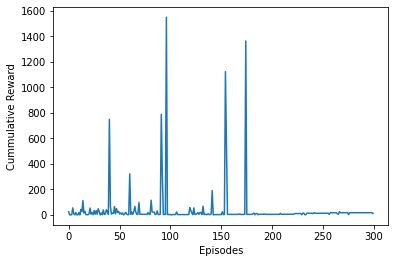

In [23]:
reward_plot(reward)

In [24]:
r = [1476.1368597970204, 1592.784408381564, 2510.847004074109, 1058.275859705276, 2073.2667384230353, 1872.790670098735, 1404.5089476445967, 1292.7391214678632, 1426.441426649999, 2060.1752235449485, 1504.7412451662763, 1562.5464845644954, 1358.3690545130303, 1274.923242878371, 1684.9487567904514, 1766.5157368337093, 1995.0948892816182, 1644.4781366865357, 1709.0227109064817, 1382.5726574598405, 1337.4935887178563, 1363.6144506540122, 978.0760748362864, 1908.8305046200524, 2102.8647864906393, 2082.4120779926966, 1847.721111722014, 1199.570460766135, 1534.6366638122129, 1025.5915530137659, 1596.4794489154444, 1016.3278210215483, 1254.612074335954, 1360.5174730076928, 1552.8293232770534, 1719.4417799643536, 1564.8070171701586, 1411.3760692821616, 899.6890902087528, 909.2499879432081, 687.271381387441, 622.3238554942103, 817.5151214721421, 1609.065676751028, 1498.6573181236497, 1172.2028471991066, 859.0987034215024, 1291.760594484764, 1228.2384499907005, 980.2441077587272, 1660.1145224940503, 1069.2320868979073, 1311.0599257152035, 620.0395824495356, 1197.8462337849398, 1198.9983511087614, 773.5899019096114, 1151.7324146436918, 729.9926589934447, 925.0019949289855, 986.7415525566607, 1006.1744279290592, 1176.3498275946615, 947.3647731653654, 989.6817197718623, 689.6566806502145, 866.6119575760162, 1004.9465987221203, 794.616745062257, 604.7487204980956, 564.782268918736, 1070.630231503132, 1401.5295620852232, 630.4540407104655, 670.8467850879794, 1424.3949807897081, 967.9689696937215, 775.8470347298281, 952.2563872477319, 392.21206541538504, 422.56390507946713, 534.5134995422438, 728.5054578653236, 738.704801912474, 990.2087866250682, 639.2424084286367, 695.0173981942581, 332.12986013378185, 783.792107669234, 691.8139107869804, 509.8085871897809, 452.45720105345066, 631.260061984655, 711.050159078727, 960.1526947186328, 288.5397919086869, 1054.1065806374115, 266.0446105922063, 779.8252113200516, 355.7165612419388, 202.8297210316388, 640.5872083029151, 329.8182016276162, 416.0924514278609, 472.319673626637, 660.5460719912115, 423.04148357816035, 974.6277972214681, 595.3870556555413, 639.6394626694428, 667.095640205129, 681.8099715069826, 373.39888533948346, 741.1553984609307, 663.1622238954432, 383.85233984056134, 495.7151142002849, 625.8354690258252, 296.2188853588448, 413.8915355722616, 677.7380391049805, 486.64326683699386, 797.7198807483684, 260.6214059973948, 299.09322835399723, 459.04733802766145, 291.18092113045645, 527.698478295858, 648.4014529846615, 791.91503752487, 698.6875713872005, 431.8191208979865, 111.93524016391692, 200.65338283039412, 498.71523469863274, 251.59126034333596, 620.2019024739542, 344.03875575162056, 155.66916634018528, 199.3644325510877, 373.3930433572864, 807.7455058988999, 284.0153215359788, 379.8385659420916, 432.9979234016948, 266.9709542996921, 602.6410469364477, 433.06479238361965, 388.54505144471347, 554.5185215206857, 296.62465305370284, 415.0498785707881, 221.56753612423972, 513.9858930400482, 320.13066802302853, 584.522935215382, 521.4905276979802, 673.3681222566189, 357.451078870622, 211.32762740057382, 91.2660505450377, 459.8498170610747, 215.69322227426912, 221.39939519663903, 416.94778911099576, 258.606954235516, 445.92343457632137, 636.3216288312963, 32.05170344544246, 87.42373561483112, 548.2833419206986, 286.1225891027471, 353.5730958115092, 195.3103080510815, 264.57706816608436, 311.5849021790449, 191.40739210036708, 186.27996404854727, 389.7251912918892, 181.20540271597642, 106.00910974436512, -40.89456478183692, 111.41859045506462, 201.88642079465825, 233.23462054565104, 262.4573717298892, 14.708332864335937, 169.1639679388865, 223.4021144011512, 339.41232122667213, 148.39686490520654, 84.38997937835137, 207.20702628135564, 358.00248524444675, 350.9344498881606, 311.5426937208933, 126.56738636662087, 25.264165597352594, 58.04580902754327, 239.65753904266572, 536.5553800637085, 273.86312154477656, 26.87307593818238, 270.37623894608464, 28.78182387693883, -38.2841016214178, -3.741786858974365, 514.8833040128178, 89.83474452314569, 219.2501536836774, 6.840505710512293, 46.20003544729998, 79.17023402627562, 37.81917846429616, 251.5329496105063, 257.49100348164967, 223.0979898739006, -52.737932228000275, 193.93675415988753, 107.34502083638179, 3.2414215686274446, 180.35374552062729, 762.2486803361967, 1659.0107143884447, 109.65567235490548, 412.8422081509461, 365.20330417750296, 117.73921039741839, 2138.15118660125, 221.2651512099759, 62.958737166363036, 4812.6463507374965, 5054.276236508756, 5741.658229688332, 1476.3163317080944, 4325.363894377164, 1651.0550370759872, 2475.773139524788, 783.774341636254, 152.06451080711864, 3969.893520717732, 5223.061116183096, 4335.708949548236, 264.85734968418996, 4692.977953726897, 1626.3361069990135, 2080.7972082561146, 11756.267659629533, 8332.469380781866, 6767.927554707473, 10593.460037468225, 16589.80386011713, 6590.2546256528485, 5273.611379002992, 4378.223884821632, 3282.8523824413433, 1647.9856106256489, 1826.5904250658687, 6070.613924316615, 4815.290795368871, 237.57633337132222, 1337.2823043356846, 1442.5494473330384, 303.3319164143578, 2505.38143864184, 8421.01687552227, 5316.469945196101, 3284.3827325444545, 1792.281771623227, 2416.7086995809473, 3028.5411945860237, 6088.164269392122, 6257.783402821514, 13521.147127945307, 12251.215626938449, 463.3498861385669, 1121.2811389536898, 586.7148043958391, 625.2027586667168, 4208.790624495071, 1190.855513291696, 331.05975953096515, 1649.2783468522211, 1638.7497500105237, 2709.812120812684, 471.9889344435692, 1258.9705434716332, 698.8790422711361, 139.20301138538088, 156.24956198574444, 3016.6526533533784, 1204.697541962363, 794.2902786564678, 297.2566318970876, 683.9977688017236, 245.45082128479024, 189.56144792159142, 216.02142989802152, 219.69095610043695, 766.9560496697055]

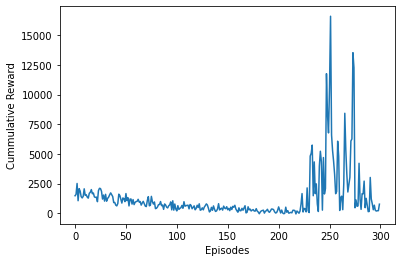

In [25]:
reward_plot(r)

In [26]:
r2 = [62.819772131351414, 54.67480222103473, 64.60874460687326, 73.00156071995191, 69.05894399615325, 68.67301599157425, 65.28322343919642, 68.78854313602436, 63.927386890407355, 61.553789017746965, 60.442218014334514, 71.20526316972065, 62.383458132203664, 79.89952670723014, 59.37004881102528, 65.93970588157781, 60.910412576244426, 66.96484312506772, 71.11751610737646, 61.50398040278171, 67.39470618077598, 66.35377502851613, 61.00417629156587, 66.30102672779142, 56.08890451624201, 61.87935618158414, 56.932578651975035, 68.98687541020037, 57.413619600298546, 67.91243522710421, 60.51533614281036, 64.95792252400226, 58.60045313611732, 66.06136639371772, 66.91441062690194, 68.81149213589744, 52.08412207615375, 73.05377726429813, 62.87417492848416, 56.04075878842679, 59.00200864903571, 74.47097577469845, 71.74441092020824, 67.79627955988254, 66.01183906764741, 76.82803698847809, 65.23445869274471, 57.5966386233081, 58.08808891574857, 65.40613627857327, 67.42026327499528, 59.39600309737214, 69.65860595784262, 65.67174651396326, 55.68567052128746, 54.70198364684474, 59.28125452742205, 59.79130473852242, 65.7709775337806, 58.813037581026435, 64.62456219318102, 57.595539754034576, 67.8973866078286, 65.81934471146158, 62.247866093180996, 66.99502430855009, 61.36372504396484, 61.85542303396755, 65.86472706063232, 55.39612599947365, 63.29961452521397, 68.74398959365467, 70.96197361064715, 75.9080756533084, 70.15264051638023, 66.42985672953385, 69.08802310819367, 66.84944837646948, 63.93030138849804, 53.92703454267878, 64.56838767963619, 65.40760587390368, 65.05901367405158, 63.00857288450418, 67.22928017175892, 70.77328812066763, 70.41020676429137, 63.42147258225577, 65.73443860526224, 73.02174002999008, 59.157846923397365, 63.573317064628505, 68.0663201561682, 64.22533520775416, 68.70938215173649, 61.12976653603111, 64.00585528595481, 64.77642154700908, 70.82089978770685, 66.46197579948397, 67.39583192845728, 63.360512233545315, 70.42200591830388, 68.0259028913357, 63.51613718229723, 61.26463596224459, 70.69696741594778, 69.37040293035838, 59.331475850788955, 55.23928036088729, 67.44931117963858, 63.72512001502208, 63.03416015115707, 58.21722089391311, 63.76232787688483, 63.94526414285232, 67.25121587138891, 60.10967473654053, 68.42587743351328, 63.57999332630322, 61.74149404899607, 65.8408375729688, 67.47861508590975, 65.79028338526852, 67.32702335522293, 67.37769269068048, 77.1800513438098, 79.78969550800318, 74.21712120106422, 69.79415380866999, 77.27877082789102, 74.89444991976943, 75.88527782000389, 73.90693609787154, 68.82577986245532, 67.64326138779505, 68.07340017597508, 71.71447279943948, 71.3420742890704, 70.21097636154335, 61.90788057447836, 64.7841528542622, 64.79796393047765, 67.06200178438472, 65.78825676480233, 66.08803989732071, 69.28343419058687, 68.57362832168043, 72.20844958772624, 72.8461698875399, 67.48472913104305, 69.38408453628269, 72.91141898659068, 72.30529858213092, 81.77188839257872, 73.54119274115467, 67.56026859780997, 61.89154969518089, 65.40284872276219, 65.35607706943304, 66.6207846215878, 66.78405578119065, 67.84818228835393, 67.40803492601282, 69.33180660542214, 68.0786232937931, 73.69556884598529, 63.902354766735286, 69.88249755927706, 72.88663077743712, 67.82698066102034, 65.4336067127198, 68.3152158571322, 69.06696630691363, 77.51686582178291, 73.55130272738198, 73.89204063355282, 62.96290591391438, 63.06765637154877, 63.16673507472375, 62.08184173453236, 60.1848131037704, 59.60698372153716, 56.4002191837369, 60.38384264484872, 60.03103140303044, 60.61553452688539, 64.16948359303825, 60.97476780483139, 59.98318356969706, 68.18304088138368, 61.493272690334905, 59.638948329002346, 61.4639255021036, 55.360670060252566, 70.51535539943633, 63.41282353186036, 64.34224443232809, 65.25378364445537, 72.27356582090653, 69.31670309617358, 71.58574544733303, 69.24318263045897, 72.71461979296846, 72.18043898352842, 82.46224948979783, 84.20131496365343, 80.94843280015677, 66.2915222292168, 70.03873088081042, 67.99210548951335, 64.1554403210324, 60.27221448641291, 67.41790552562175, 63.05409104042008, 62.64240507500978, 61.64195735421596, 65.54350091024105, 63.88874340023118, 65.5346922657507, 65.78867802682454, 66.97428898616398, 62.652177765313375, 65.01237765005693, 65.45296352745443, 65.63046565376368, 63.655662427629395, 65.7313802760748, 63.97350556932053, 63.26267319156477, 63.99970019957178, 75.11881629351598, 71.74145252780758, 70.52097569013785, 77.80413679059411, 75.4570369409739, 82.18502729940825, 78.40789519391745, 75.52861134386977, 85.4075664468579, 81.1691154089623, 78.7289783465042, 77.07110025716237, 79.30413035418023, 76.03970706023037, 73.34320539852806, 72.99180452838067, 74.53726083762695, 73.8584301428317, 72.91776767322956, 75.78977929164957, 68.64564859579168, 66.45724284548058, 68.62310560641473, 66.12923963268145, 67.46694365568815, 64.5374450999907, 62.392628237963514, 64.55026967130505, 64.4212591893714, 58.83048586304355, 64.26270546572839, 60.30202779556011, 63.40340140706909, 65.96245600894258, 70.50384171195087, 68.19781275287335, 67.03408258917041, 67.48877986016313, 69.01975816104418, 71.72721595907117, 70.81196259629336, 71.80146910227168, 75.41082907827315, 72.55330797885853, 72.25737250445191, 75.41466589752824, 73.11585508496472, 72.20162907388344, 74.93661160876646, 68.62068663887028, 68.18944470876758, 67.29943721831705, 68.07192439105978, 69.0643133016683, 70.46686516719296, 71.82482295566038, 68.96241829778684, 66.64447619821291, 65.90044597810515, 63.08582215593292, 62.660020341430645, 64.60562100183297, 67.04284017193292, 69.84506328860803, 68.62931509437684, 68.38319758455069, 70.45506367291983, 69.14096788708606, 71.36024930125221]

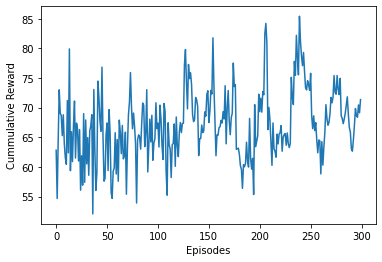

In [27]:
reward_plot(r2)

In [28]:
r3 = [42.06481863553306, 47.859112803489474, 43.27043470647823, 45.73138570295157, 35.688952010762314, 34.42904692459401, 39.437176553821836, 37.90411949262554, 40.938064714819085, 51.45378360546026, 43.67569764719077, 39.17543550759977, 35.434933623351064, 29.188450190315233, 36.447753454831314, 37.42935614764741, 38.69973944415795, 35.22070458371011, 29.472313875333384, 34.969074613575884, 31.712866745044966, 36.4625069461423, 33.9852925463733, 30.242729922640997, 19.484006603767657, 32.21563602724327, 44.016442759116096, 32.0786700866582, 32.475937922887205, 37.54136028119739, 34.29702396038159, 40.06539859244214, 30.579824605671064, 28.302242001700836, 31.82434528975896, 22.86520154320733, 28.326970120227838, 27.06194183604979, 28.637335704119558, 30.58471766630376, 27.916186207413894, 32.6053594361525, 30.1191735006043, 21.65153589173468, 30.107386942309898, 23.443774531200788, 22.922566259585054, 26.943091701778854, 20.44784766693485, 28.713885708376367, 28.541957186230732, 24.863798399678963, 16.71702216595355, 27.91444805808145, 25.980797237205646, 31.759555794206815, 27.484279395923792, 27.246974529132125, 17.710275074319558, 29.00487229093845, 29.952374654355662, 19.677313758065257, 23.207543758313413, 22.989823870877935, 23.986060561346704, 27.424000634808582, 31.159780866877295, 14.246783163478625, 20.23661400911148, 23.782712854801474, 14.522158950958362, 21.46394586345542, 19.689191178188533, 15.535282783047773, 15.069395483837244, 18.00979259922233, 17.500473682420804, 21.965927982456016, 18.789382274264884, 10.223587075969194, 18.963423056230077, 30.971725854555395, 23.27731651037693, 19.512973676187855, 21.750543722107547, 19.003682937698517, 11.11334665403028, 20.252663199564246, 30.172643312508573, 30.71048431953085, 24.672834932250765, 29.166173475788806, 39.4252481326951, 32.41735806790951, 32.9260829262999, 23.405040527678548, 36.681307544731446, 23.177230115051927, 45.659703123910354, 45.654454868653545, 18.371601307489627, 18.856413887546847, 38.49564753984338, 42.893182807390815, 47.162307438584286, 49.374329368610816, 46.37614872048384, 49.41384415264789, 45.39087774525887, 48.59058979478929, 47.13550717222861, 22.35667807176675, 43.19995721305444, 45.11350901269665, 51.134689333670536, 43.35994758791145, 50.3570260262081, 47.38137020874817, 50.36140642871532, 48.622049686226035, 51.13382755595263, 56.38815700216773, 50.115750421697015, 47.375082310856996, 44.62887346402865, 41.36068682171024, 44.61283290224748, 46.37812841464224, 46.39732146220191, 51.10675705413244, 43.107517593509044, 44.6110731200342, 42.128110635616366, 48.36726371442963, 50.12394265331304, 47.87469797008461, 52.638255880471974, 48.61066042870661, 44.60827501929864, 48.84608008955875, 45.138673306735626, 46.843888576492475, 49.34534156326654, 50.63973026289149, 15.127449074276088, 6.873859341736106, 12.117513197828375, 5.375241010586072, 10.363643646297469, 8.111496702367809, 7.875842231763883, 10.87738323932192, 10.867025699429085, 5.87347276672584, 5.12942115388336, 9.608619448889014, 10.886089780547243, 5.103430342848404, 9.372381097938778, 10.366535597666315, 13.368368032100472, 12.908490419079873, 8.363960769168898, 4.879298778872911, 8.141076394672385, 13.878269569968136, 6.361738286358219, 10.88429193848759, 8.861804167357835, 7.365890808591437, 5.375731562989185, 17.11239015582928, 5.620294746534293, 3.6034108869357784, 12.37213111866587, 8.126766584149959, 6.385618148628169, 8.13018424654466, 8.628894904245206, 5.605229802319986, 1.1043843744488064, 21.670329211960382, 16.64881978052076, 18.142902099218738, 42.36953749432349, 47.597503038742815, 50.0967820335148, 48.340187445530425, 43.33788813980971, 10.357527644068037, 4.611395109871926, 7.60477628547019, 9.862861128374199, 3.5945261772716557, 2.5915986195629688, 9.621524801341403, 6.3531670187334415, 6.344649655077273, 6.834055931257164, 1.6007885854371708, 7.352568724576779, 13.633756616984826, 26.421472224847992, 28.695737704316244, 27.43188205603476, 27.431800969050006, 29.205765061533636, 26.93054995915736, 27.9384406601115, 30.676206885809574, 30.44516792251431, 29.4347047260097, 26.93819681101465, 26.681525194863713, 26.690243191220038, 27.678775252363092, 26.944271851750955, 25.185157952340056, 17.22093735575172, 23.082852781640092, 7.666228635434187, 3.782796142671654, 2.0472643588280564, 7.5048923143318405, 6.5021413582917145, 6.277261293476399, 5.790254977526598, 4.734255431407863, 4.7813980416284, 4.782066379842042, 18.18205330590699, 5.9617471711825525, 4.2575243459212615, 3.783224428382272, 6.027698923182236, 6.272614241144677, 4.77216557751079, 10.235048409653421, 11.240805686152292, 5.831553206623922, 3.79982156304567, 4.791275664366255, 3.795141448438084, 4.566577953561575, 1.599029423966418, 13.058958507065974, 7.554207584713926, 3.3556270507176578, 2.5866815017922917, 5.312346033724918, 8.043165139001122, 6.548921720777775, 4.058585130009044, 5.0300013442785, 4.7854546914849205, 4.547239253201224, 2.5731141245290816, 3.8157824909611047, 1.8197206379125046, 5.041835316786381, 2.08143806427692, 3.082994040645361, 3.30079187044909, 3.0407298049971354, 6.7312197182525, 2.0247295274774157, 4.288018287015364, 4.047282345723502, 3.259584919442292, 2.2852232038702502, 4.554244819424899, 5.752031762301157, 5.031048305168527, 4.799514265016691, 1.9952509958108058, 4.764759015915798, 2.537602714238781, 2.775658993275949, 5.25922264258892, 3.267502494562522, 5.745166152883646, 3.5153912550744697, 4.528463898877776, 8.462742589344739, 3.2449755473674378, 3.9852018773991205, 3.461831714013467, 2.7697906172290265, 3.4995978741864886, 2.9994412802485297, 3.4999681202839876, 4.759650536444652, 2.754732809628482, 2.266496839149836, 2.001195883869529, 4.23729872276753, 0.5079657084759308, 3.980031270848934, 3.0129042356921496, 3.748201315396589]



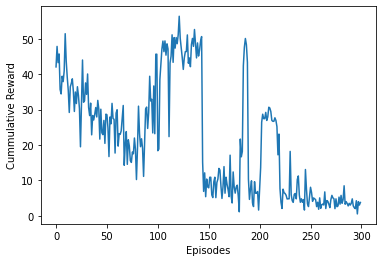

In [29]:
reward_plot(r3)

In [30]:
ac = [[7, 0, 0], [7, 0, 1], [7, 0, 2], [7, 1, 0], [7, 1, 1], [7, 1, 2], [7, 2, 0], [7, 2, 1], [7, 2, 2], [7, 3, 0], [7, 3, 1], [7, 3, 2], [7, 4, 0], [7, 4, 1], [7, 4, 2], [8, 0, 0], [8, 0, 1], [8, 0, 2], [8, 1, 0], [8, 1, 1], [8, 1, 2], [8, 2, 0], [8, 2, 1], [8, 2, 2], [8, 3, 0], [8, 3, 1], [8, 3, 2], [8, 4, 0], [8, 4, 1], [8, 4, 2], [9, 0, 0], [9, 0, 1], [9, 0, 2], [9, 1, 0], [9, 1, 1], [9, 1, 2], [9, 2, 0], [9, 2, 1], [9, 2, 2], [9, 3, 0], [9, 3, 1], [9, 3, 2], [9, 4, 0], [9, 4, 1], [9, 4, 2], [10, 0, 0], [10, 0, 1], [10, 0, 2], [10, 1, 0], [10, 1, 1], [10, 1, 2], [10, 2, 0], [10, 2, 1], [10, 2, 2], [10, 3, 0], [10, 3, 1], [10, 3, 2], [10, 4, 0], [10, 4, 1], [10, 4, 2], [11, 0, 0], [11, 0, 1], [11, 0, 2], [11, 1, 0], [11, 1, 1], [11, 1, 2], [11, 2, 0], [11, 2, 1], [11, 2, 2], [11, 3, 0], [11, 3, 1], [11, 3, 2], [11, 4, 0], [11, 4, 1], [11, 4, 2], [12, 0, 0], [12, 0, 1], [12, 0, 2], [12, 1, 0], [12, 1, 1], [12, 1, 2], [12, 2, 0], [12, 2, 1], [12, 2, 2], [12, 3, 0], [12, 3, 1], [12, 3, 2], [12, 4, 0], [12, 4, 1], [12, 4, 2]]

In [31]:
r4 = [45.533732196558134, 35.86946684150438, 48.79111819053176, 36.22057181423254, 35.43258141851872, 41.173098540646116, 38.91437177016065, 36.6718025416381, 33.3909628639711, 35.422523537064606, 37.170709525603144, 39.66684127746749, 43.677128784109314, 43.90238410470303, 35.16209115077435, 31.18660376917245, 39.15836313737809, 34.91410320369904, 38.41058977216405, 34.891883842042304, 51.713092067022245, 35.21915255395523, 39.70504319308107, 48.67237068778332, 45.17674704613612, 42.414772203704885, 40.919629192615965, 45.41151760125165, 33.92648857840417, 41.96144105493026, 49.96756730906166, 35.95681558366595, 35.4347777490991, 54.92594803453352, 42.17632608712124, 46.24339696491232, 38.994008826743375, 38.21075221185863, 45.44130046887796, 34.44081989518718, 41.00023590331502, 31.78841194414877, 42.01010529700769, 54.23667219712483, 53.62199319553231, 59.45736748458455, 59.40030590985829, 56.93628617426264, 35.713850868287324, 53.727803476534376, 39.668789712232844, 42.48398525478524, 56.20454624260334, 61.72516742740432, 50.67464493230191, 36.716474212120666, 23.5111902916504, 28.989584096530443, 25.060690284178154, 7.310034513425563, 13.530109427947757, 18.540158835366782, 33.460360533791295, 36.41186664669321, 43.63440958913522, 54.90104086462062, 34.67123943855982, 42.88519145545309, 58.91980541684313, 60.9196086248273, 36.419881487242925, 13.767590312889567, 29.179947151109953, 40.22036359968967, 46.717567876797396, 54.94010705135145, 63.91512390989541, 60.447612924069766, 36.26676009150197, 67.81140560926244, 49.6389053758867, 46.20891263072077, 39.46255320193417, 33.74183585054824, 43.28270169046835, 49.46198383979041, 42.92955563251125, 47.86880386647499, 18.654023264034112, 19.94483610494676, 38.76960185636363, 42.00657511190975, 45.00687415256361, 45.44619037104409, 38.7245530452515, 49.14449194625798, 70.85200156336893, 56.906658078102915, 62.90726400589903, 32.340484430885404, 68.1361001212891, 68.90529361327636, 65.95807322521455, 58.67746848467051, 51.20790575734382, 66.47910317860163, 55.51173905261242, 55.949079945220035, 69.69889842397619, 54.24111656300927, 36.07764043234038, 44.176697208432536, 46.67772724489927, 50.68726205147906, 42.97067372037209, 49.123527490891604, 56.78227926550637, 47.92096382136655, 41.35657779218238, 32.51252313439704, 52.46703202343445, 46.99967726424409, 24.777773285786626, 59.64321719305341, 44.620289236948665, 52.10794957840136, 19.95787195468643, 32.49828746823665, 56.181436905645874, 49.44174295191475, 48.89316455184626, 59.93955647754987, 65.8939599952367, 62.622018076758415, 39.50020800234579, 42.58041390291289, 49.27118926510117, 63.413600969670355, 51.374364746056585, 36.79523319209578, -0.8558413874750348, 56.37704629392959, 9.779542682875457, 34.89078576737323, 38.86500873328195, 51.64350844191553, 20.928865385552463, 56.74167722028927, 69.35680665192996, 23.446503505861543, 22.525566228912737, 16.721760014473414, 10.657644855130663, 30.61341187736882, 51.701479026322446, 49.720650946891126, 56.82655073967066, 42.12617477555476, 60.214283509774546, 78.72510546111192, 66.81564276681286, 63.62808325959332, 63.954532285805556, 64.26972181928855, 65.85879240227703, 44.36327126812133, 17.889997878460186, 51.38225088271731, 58.700874653931834, 84.63826303209704, 70.76638083903546, 82.3573168136884, 67.78901222447776, 79.22620563247084, 72.36891944230881, 70.7728828235222, 77.6010014964094, 53.70182410648975, 51.928052385781314, 83.41791703792377, 61.763603722422886, 81.22611695270957, 72.46406608509827, 57.9835025253557, 70.03228818618436, 63.40953775640114, 62.70177603947856, 70.69191734214378, 71.58171378923095, 76.12971234586281, 78.42745336210112, 81.45480536956397, 77.71295882241071, 74.64265039931126, 71.82855636558372, 80.08139777635671, 75.08888881332699, 66.98012922528011, 71.07044924173412, 54.55199269223523, 74.05926804548712, 76.26347940324594, 83.86551471275658, 68.68740743612062, 63.40886738024577, 61.37836697839489, 67.8314099348063, 35.79625195172742, 41.906679253272486, 54.83887279116913, 70.47179697273417, 74.33777992633495, 72.97523608066521, 55.824695450608765, 75.68947421871106, 56.34714691569789, 61.441452710303906, 60.67544963533751, 75.9646562339922, 73.84291342273545, 73.87265350082882, 82.24873152841285, 71.59624495405814, 61.62931421081364, 24.131301059492117, 42.8973750634869, 63.86568480967542, 59.39055847126935, 50.61910353446658, 58.48714557302202, 56.69004353929943, 57.95085918728535, 65.36286269082031, 71.84294798915305, 64.63759691735268, 65.34836335296966, 82.74837911377983, 83.44799109036568, 84.21895498990501, 85.82143884724798, 70.47029592619351, 72.28952911642457, 76.32369186083746, 69.81900666215745, 85.40950199888869, 85.92740001475583, 64.66134099622917, 83.66708881629103, 45.00073835618973, 60.048750988696256, 50.24793017156449, 59.6105178872704, 69.88959813760928, 87.59513261420383, 59.476605970769924, 49.588166279067714, 56.440251362184604, 45.0908299571291, 69.06396624298763, 62.698923995659335, 88.57310579366354, 45.11814955342374, 35.61059716153249, 57.70907463948866, 60.691274930488696, 47.61494741519167, 41.81232528800506, 48.5204829975104, 55.765657200332775, 68.11450971237576, 66.82333207070972, 81.68626473347315, 83.88253658566131, 36.91116656287652, 42.2006596904486, 40.421663808184526, 36.18053659390669, 60.32399083720127, 78.61045132834148, 72.72428712243406, 85.52871838516795, 78.99280714876414, 59.09413077605239, 81.93186703894054, 88.59010987579508, 78.31925876340466, 49.42684372075402, 58.48513497723375, 67.89374413405254, 51.95542171582523, 68.09322645804912, 54.48359604073997, 62.403959411990584, 76.17045752161965, 84.8989234985828, 65.56214871402474, 47.17872878469379, 64.23253804719229, 84.84852258497595, 63.41054304432072]

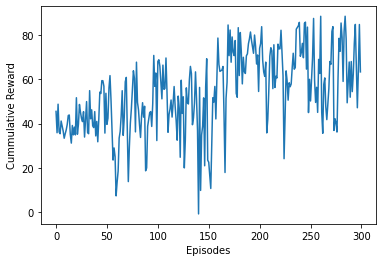

In [32]:
reward_plot(r4)

In [33]:
r = [52.419851325680824, 52.97251455298557, 50.24738359106334, 45.40953385940632, 55.57377263080802, 47.73496624958193, 58.53537454968, 40.5515371146607, 36.29254703141221, 43.42932698054555, 55.54327674114256, 48.52608972846494, 50.20712238909834, 32.51851144380661, 42.82289059863476, 45.515658703471175, 46.42457227099193, 49.13169285934124, 34.86193551860503, 40.386546451147105, 34.17056073952234, 38.866200462357966, 46.405809168499445, 51.40113637566528, 52.15753945783648, 45.05073458873416, 41.77634411512972, 37.61457004786673, 59.873941822856295, 39.45794433862196, 37.1525715877115, 50.32761290206362, 51.78277664490463, 34.90629469747739, 56.27588903560431, 32.49101367392776, 67.08989344087519, 63.184052370768505, 58.889923302166046, 58.594012135784965, 51.48028847919831, 58.05935746313037, 53.00993289643293, 39.57116903955755, 56.712704798609764, 64.41759602187302, 57.529674189976674, 48.65422409187453, 64.05662364337725, 64.72113688753427, 42.67219094167028, 51.87487087849169, 39.08739033841783, 55.52959251465428, 55.12808179236933, 76.4430067675139, 58.085953320092244, 62.78788333507764, 55.54819107338949, 60.337196511570376, 56.68686522055228, 58.24182271612272, 60.89018150921717, 58.01320885745506, 72.01499292554935, 62.128036972279055, 62.87733906895918, 46.25286080284924, 70.52864054615071, 63.258957894129026, 69.5084710961141, 73.07258101374933, 64.3423033891468, 47.506492729630246, 67.00993748391022, 62.23943716103741, 82.72150540856474, 67.94683886405724, 60.00087501222126, 48.58142814141687, 64.18102874978953, 78.98172673568033, 71.32217922565196, 69.57593754441515, 75.78999107441466, 77.75206213735682, 57.91407121960833, 65.65315816140611, 66.86463737292414, 76.58694282535637, 79.60125672119749, 72.15130968622141, 90.71790957811885, 72.37784707524958, 73.26948314412965, 81.74770949902764, 66.17951126572304, 83.598377844397, 70.74111121664032, 71.62764284828903, 87.63941039262838, 77.10426784242708, 72.08510040674282, 53.91905238442072, 48.041849894101254, 64.70251803679636, 68.68929616460848, 70.0447922765618, 88.48064612828377, 81.49730437366716, 79.0921074857736, 76.46966968644641, 78.88973515379595, 73.33838662076772, 84.57311049070809, 69.52531259306002, 86.52420134836656, 69.03924767176161, 77.27393429785984, 70.22713726788149, 74.48239413600614, 70.23509401439476, 63.522208722830996, 69.04891159335416, 49.418967631180045, 62.71403555321987, 93.1074621626341, 78.55877281660375, 88.29799034891538, 66.57199067047164, 76.88080464841761, 73.61196022323188, 93.63624677086105, 58.46210371417469, 69.90759814287539, 74.28684694281003, 74.41329886465026, 73.29990483493665, 85.03248476010376, 95.06859389569729, 85.15671487326517, 82.18739527597687, 82.1215788164286, 83.56297002441005, 93.27466386350414, 82.04760878734967, 82.49094052748858, 61.82972337767912, 67.87225307422379, 95.87881245571108, 80.8399754553248, 95.25050876201944, 92.80140616265678, 61.39553710315016, 96.07654562785609, 79.69730681335582, 76.09669349017756, 93.24272635404496, 92.0714410103428, 73.91692251140104, 68.85339096031045, 88.26805584663362, 83.46052829047466, 83.39304183606947, 78.37682381133712, 83.26878109389627, 93.43825944205635, 77.12666082283403, 86.7241145130159, 96.38514893798174, 75.02567820910068, 63.33687289673287, 70.0497750579614, 59.97958136422381, 72.61810341408247, 98.26136568143949, 94.6721379260909, 93.91266581073232, 95.40190101258077, 80.3177803006725, 104.06137567379018, 81.03572507406963, 77.08122687656677, 94.03682418040857, 101.32381438785575, 79.19457989635293, 77.76904365583907, 86.60015661034451, 88.03389991406563, 86.24722690518828, 80.82679119474399, 93.56430071149764, 64.02650682175286, 65.82493526703402, 76.69025663749515, 82.63306611747075, 100.98763432461594, 95.0882918443862, 94.64255980104413, 72.0145399731431, 86.12841372891856, 109.46706919324467, 96.32430236246422, 95.33522108961616, 69.31665076056699, 91.62147463453252, 99.42887732498733, 107.7500233548658, 96.17581600054424, 60.83667609216637, 94.60777108159576, 96.00651047459597, 88.33085962832705, 100.10738643439211, 107.42947795609108, 90.11664111409225, 84.36768639692423, 81.87577595056332, 110.99565189252421, 115.22371824880543, 110.95368085253105, 112.07714351197409, 112.77818713048633, 104.03130443022278, 95.88742092072142, 116.55718869370813, 104.40263513108319, 108.00057492255712, 108.276456737716, 93.2584584565324, 110.35303126542762, 111.99098616087059, 103.87555292258573, 117.89018100023189, 108.70034979009546, 110.56567276120796, 88.62419294015909, 114.2002874700453, 102.0424882455314, 103.4234029374212, 92.1842961882321, 106.86289738218912, 109.83476933514604, 106.33412908816969, 114.90601646406024, 105.4160428777374, 117.94575196815846, 99.97156947252509, 94.4838913700673, 86.15390246647513, 91.32575637898623, 100.71253207416099, 115.51689732997929, 71.75307335987884, 68.93555621734562, 103.60997947247735, 81.02803162528159, 94.15304612326244, 85.5897982270713, 106.32314556786802, 99.84774300071335, 107.90755680564884, 109.1983937746391, 73.11866307881168, 90.31353407880222, 101.29069203003208, 80.69710980898316, 90.07322913017921, 98.26706556009972, 116.56690347005313, 93.7415208048072, 57.179825237279495, 81.64278012435292, 94.63006880053408, 100.32892350718892, 98.7557952749036, 113.73786992590074, 96.98454570879585, 98.98912122302114, 87.01353081326346, 115.67497021319424, 105.3555172994959, 106.8804446300846, 109.80418525708856, 91.52177621791564, 86.00485817408823, 110.44198105008397, 120.0138187796251, 113.09395165656933, 92.78113779515002, 80.3818061429636, 59.253258344110904, 114.90854881586068, 94.44721257139024, 102.18815045104952, 57.211068732844616, 121.22356419304113, 113.9831065430853, 85.6011532910269, 107.52541465642439]

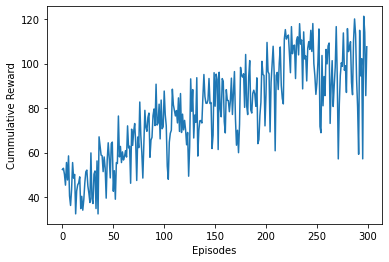

In [34]:
reward_plot(r)

In [35]:
r= [33.781945584410444, 30.588473953650567, 32.495405773530166, 30.425027727527212, 37.46369818114695, 26.452752515579444, 29.124017775097077, 34.65515529689389, 31.62745037799748, 30.6294020584414, 37.34605746541195, 44.107088640234586, 40.6135816735642, 37.604456558239875, 39.847707839326766, 34.33366983122242, 32.31866639858879, 33.83963551976601, 27.311454209225637, 42.820709009530894, 45.07959413611927, 27.567897057528207, 33.826577888688014, 32.81912569202555, 34.308969052172756, 37.80458788155958, 45.82294736280431, 40.31554521233968, 40.818870877243675, 42.558871063629866, 40.31051981494231, 40.8272343675791, 29.809135189314137, 55.829700522332125, 38.302438183247624, 16.543239369228598, 39.31426155231837, 29.816846946356826, 37.054126789049405, 32.54466108823405, 44.81223369173442, 45.558769977495736, 40.30265227920648, 34.30388396111704, 39.80320663302105, 36.80421119547494, 46.32192728702631, 43.30324750746184, 42.559592262856555, 29.038628642384996, 32.802026125877795, 30.535697836377064, 37.55120474592263, 38.04362945963253, 47.05793869633214, 38.298163970257896, 26.797841663845652, 46.55421720612836, 33.04849484131608, 44.05738984118018, 42.798718151988055, 35.05579625424021, 34.05120750443808, 38.5432672249825, 33.29260484021485, 32.043112487594996, 35.805085823821116, 39.05560403744676, 36.804140985466944, 30.550206908660243, 30.29785497409882, 41.30044105673135, 25.77846675060579, 42.80967044094392, 38.79590190701066, 28.05359610991832, 37.552595467292505, 35.300188649147785, 42.54559114265909, 48.55672810625936, 43.541990616311466, 47.06212467709781, 34.791213424494124, 39.04444917570863, 37.0401207962328, 44.55423032045461, 38.798032852202425, 27.04455753514267, 40.302155254229895, 39.05539369383682, 49.30187177291575, 30.804036273254706, 31.296807035962985, 18.283354731023852, 36.300516501277635, 31.78766938355568, 31.291828619305637, 45.790421301368056, 34.52716737615633, 53.80649438888827, 46.29475005989149, 56.04395587494031, 62.30835001790863, 53.548283971139874, 41.79540931235941, 45.79803242802826, 33.538855548126655, 45.79550019932808, 64.05701615633221, 46.551525739343916, 38.7816549917832, 33.53828371333967, 44.29996571448129, 44.31253526439433, 51.79422069417405, 52.30426447343322, 68.55965016868973, 63.559520088913544, 65.30561051255847, 43.04576517400531, 56.30837589585529, 46.55431175918932, 25.786435229359643, 41.54087323461368, 51.80213174473906, 39.299413695077575, 45.0541710959656, 28.7865310019238, 20.786595466346803, 27.79487931558918, 30.55130609258875, 24.55740379557713, 38.80476015360209, 43.78870948227981, 34.547974720948424, 42.5495684973557, 49.293786485311756, 55.054246353133934, 56.544236008291, 43.28350405718795, 48.054768992389675, 62.79485002103594, 55.0510876273378, 52.799702560122135, 39.2941993408389, 33.29266080279937, 34.04188058304545, 47.54916938529843, 56.787864395249535, 51.804900775623096, 65.80297077366075, 44.782814415839994, 46.53114284432582, 45.532981697545694, 39.78224281275779, 29.290449608944204, 43.29079152447783, 20.27974758200917, 15.276475891728424, 26.803816040411203, 39.300927669206814, 44.28920565556971, 50.791903031663765, 27.79515863227885, 57.54515693884445, 55.789962629463965, 41.531671000211524, 14.756729044524185, 28.276620241591587, 15.765994436551338, 32.78520807893705, 32.29549746645219, 41.288268248690166, 46.536559684474796, 55.28535841744843, 76.29230906892421, 90.29173695687257, 84.54922505718736, 88.7962078731962, 85.80038977857663, 92.05588037211719, 91.04941582474221, 80.79399938386415, 87.5412654193967, 88.54101756737488, 91.53764083035877, 91.54029623105424, 60.28416703802409, 84.55810191568928, 85.31341890833602, 88.53941101282909, 89.29287721274324, 88.04736601786807, 86.8006814691354, 88.79810595498306, 90.29706511713279, 91.5467867590932, 90.7854280770893, 92.04208263161988, 84.54869590941283, 88.7848199117915, 88.53742426417851, 48.57631047519435, 48.075938335638, 52.082527594664526, 86.04313266558886, 83.0417054187832, 20.29587940520371, 50.794802042940006, 25.298101472662424, 40.0577668788461, 78.54575384491622, 90.54202504008272, 90.29197916411249, 93.03913587316778, 95.78850617584978, 93.78944355349634, 87.29190433064024, 86.5367103477655, 91.78896209005083, 95.53940577370975, 93.03724088907701, 94.78760777754098, 88.78450116872224, 95.28713219901768, 73.29164826420555, 94.28164697732828, 94.53793778215689, 95.03411460140126, 91.78053205019762, 87.28903520452629, 91.2911851001731, 81.80569525539495, 94.03327035865614, 95.288251701689, 95.53731889307761, 92.79360284482243, 95.03651332177432, 91.5357602659986, 91.03200457957108, 84.28609146465925, 97.03619641540675, 94.52982984350717, 95.03587130178556, 93.28535718645908, 91.78940635417221, 92.53655180962512, 98.52930092282645, 93.03038175937871, 95.28348386811817, 93.03073559584726, 94.53290148845875, 93.28456565022779, 94.02973403101979, 95.2839951467913, 94.27992866978245, 95.28002963620627, 95.0228923878773, 96.27884343646687, 94.27524797903963, 97.53153817041456, 91.28714116376726, 95.78469301325102, 95.28040133216619, 96.03125322135718, 94.52789406194559, 95.28072413378355, 99.27684116165501, 94.78431239861278, 95.77864200919807, 95.0260092037859, 95.53301118363339, 92.0271887089377, 93.03158129242054, 98.02567587454547, 97.02900039649357, 91.77827366281734, 97.77851535735763, 97.27942282066581, 97.2713020243829, 99.02926212648703, 94.77729269669524, 94.03179388360545, 97.27927076454625, 96.28074230034655, 97.28346796162964, 96.78432150683042, 94.02501449097771, 95.28442278183525, 97.02409767489993, 93.78778912187481, 97.0319168662155, 95.28175027525347, 95.28301634027169, 99.02853566856872, 95.77816387771847, 96.77702809302798, 99.27487717019983, 95.79507730928013, 97.77207663708509]

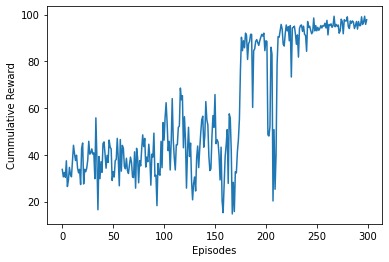

In [36]:
reward_plot(r)

In [37]:
r  = [26.11055229732022, 18.877935382592042, 25.35707688804842, 34.33376166052538, 27.827248916848188, 28.82794620595212, 32.57771444460706, 30.327662447098565, 20.0687208150199, 30.581379927873275, 29.08079816685012, 35.334606342465804, 28.58239172007149, 14.82729964737508, 27.583792525761496, 36.08088140537509, 29.83175885411478, 33.081135779714984, 42.33537610694456, 39.83865096736883, 31.332851012938974, 42.59269524137381, 27.836043406123636, 21.322830315018223, 30.327935335851553, 39.58336858948411, 31.081732502249572, 22.831002096856427, 26.079290101850837, 32.837354935931245, 35.837776720691075, 33.08538250630994, 19.828995919508333, 19.578523170287415, 30.825637559584134, 38.58762635130708, 28.827369639595528, 23.323199618436792, 31.080036661274743, 31.090363772028567, 24.075966809162033, 16.313398349825366, 30.827152700674265, 22.320255033162873, 36.33142919730388, 27.333520479270707, 36.58847012491389, 31.584113101665377, 19.823046608005683, 29.07980039265286, 37.58937884140975, 36.8361975737892, 37.08538969749257, 35.584320680909926, 22.080469991782397, 35.09052699271176, 37.08488122272245, 31.836279037701082, 36.332946345425, 26.33181770013162, 36.82520546632202, 39.090391418942964, 38.83675380994985, 24.331025645528886, 37.84686644376442, 36.587772142368244, 38.077390330752614, 34.838353318822314, 33.59830427410264, 31.089136949029413, 32.08212973961047, 43.59308170481049, 36.090305040018784, 42.82970633160921, 44.838510428604614, 47.84391323385994, 28.829107275687115, 47.59027994621741, 45.59358979311357, 50.338588673612264, 32.57862672168915, 46.84182745071901, 48.33925270813211, 41.59177889009257, 45.83509682112056, 64.5933724907861, 38.587834927822136, 47.58720812861954, 61.586493867263876, 36.59445884285942, 50.098884205136144, 51.58480553165957, 54.83909205004023, 38.08788275883346, 50.345905489306126, 45.823440789117235, 50.33728417974239, 55.815496173380254, 63.3392572548601, 47.08084208366372, 52.096321031620036, 41.5948428565857, 39.33959894086467, 53.3357195762341, 48.34040013110191, 32.33484784796477, 55.343241286531466, 63.10214846807814, 33.3429742186754, 12.583176334783426, 25.82381075605171, 20.565039337885143, 42.57684194196225, 45.08725207952564, 47.09644768746516, 65.08605667757767, 67.34575546689804, 54.84205272086953, 74.85501514597244, 76.8446675101158, 82.0887226143781, 74.84387808774116, 70.58920984498748, 77.33579211144115, 88.34812704055238, 75.09257841527524, 76.83758473915289, 80.57980332987091, 78.5919224294615, 79.3452342647713, 84.8415626647467, 80.09999518122038, 76.0831285546231, 79.58581281051453, 85.59924425138334, 78.34162778840434, 80.0640833514671, 75.29478319961594, 80.8186092269347, 75.59456271335226, 77.33939691946995, 81.33672613315495, 80.07815794598896, 87.32788061771711, 81.35634298261208, 79.85075156092915, 76.09401238297058, 75.83429220888576, 79.10125631833111, 86.35926025133409, 85.85044154543519, 85.85189497024449, 78.09128212672458, 88.86233798180392, 85.86266175010344, 77.84333421823243, 83.59938897143121, 80.33946652227218, 81.35046589823044, 88.35736953190286, 86.85295400374758, 78.1000909962342, 81.60825039423408, 86.35980970114312, 82.6064609471705, 85.10976428122561, 87.3648147991269, 79.85766839327093, 78.34901273584104, 79.83429462422586, 86.82780006454057, 83.82686565721934, 85.83957056041021, 92.84901434702492, 76.83980875650802, 85.08194178105468, 84.07503814046889, 88.33720234157049, 79.33784105556492, 86.0820262589712, 88.3445291434964, 84.85184063170217, 84.85021953552368, 80.04638935543271, 77.5606763023192, 47.80975837008421, 58.32466427252731, 40.06216323570502, 47.56830420313258, 66.29720355182177, 85.80501990615112, 85.82245125483811, 83.8379296072037, 90.85610513642305, 95.85320258212981, 76.59056218600897, 89.34423606328515, 79.35485081836028, 63.58254573572527, 80.08696002011726, 55.33016650050932, 83.57728431850812, 57.58180649885449, 67.34545263227037, 69.8444027833732, 68.09923783599714, 82.35694724067392, 31.832206853074705, 52.318779245608326, 76.33695974699005, 68.83065124790465, 79.60293910589009, 83.33161030454364, 71.57471203922655, 83.59229465747188, 79.35900096697473, 67.58235698617752, 68.08938887422724, 49.57753379691279, 60.84783617742513, 70.0905161804332, 32.062074308226016, 44.304865535847306, 70.58083723418403, 76.59749345067074, 73.81098323474326, 78.80523038247641, 44.29180199490146, 44.31700615514643, 76.3469939735337, 66.6037368782886, 75.86533396280038, 58.623464016270255, 72.8492513475623, 76.1065209491513, 52.073343857179445, 95.60176096158457, 56.84637815770061, 89.84594251171028, 87.81797943637741, 94.08216020355817, 90.0756354793323, 86.08081924920062, 85.34548802037332, 80.0921972757391, 80.57980358035803, 85.0806898783587, 88.60221368157966, 85.85249495531936, 70.84991042741923, 61.07463037729148, 42.57181209552434, 85.34134022591444, 90.09002949062078, 84.85055826361662, 93.58820360141084, 90.59742685706067, 77.56228300518306, 21.343458636310388, -1.1947170825109623, 14.306610747668008, 57.344241466574445, 79.61388027575916, 84.59944938342636, 65.10251230721592, 84.56437163001223, 93.34816552670802, 97.61815697348892, 96.85554399333016, 96.35565303854331, 84.29772211358205, 96.62443587038919, 90.03627838440568, 93.08198170139976, 92.07528538253749, 95.09694773629602, 90.3595694040702, 93.834597782862, 96.3699475040506, 95.80888391040224, 97.82096141606837, 92.61969915264118, 99.34648693599229, 94.86599006690264, 93.36845809300743, 94.59257894731779, 96.13551500453526, 93.61808392865761, 97.36148000343469, 97.36426444697008, 98.34452741206388, 96.5993226893385, 92.11610262620405, 97.10252423464384, 94.86109184953071, 97.62282448049434, 95.33964770546424, 97.36867113032783, 95.0937905363287, 99.37797074435163]

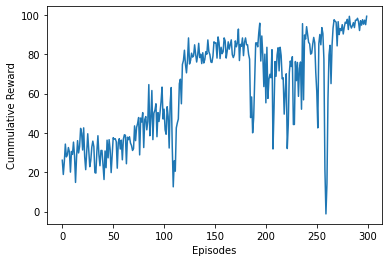

In [38]:
reward_plot(r)

In [69]:
r = [28.99971295441051, 20.84932990761206, 43.82872829911605, 40.5626669096533, 22.79943328585022, 33.79111109331687, 27.790429450545407, 34.04466080109188, 36.79391276650448, 30.28824122572099, 39.0441857436272, 40.29210654130441, 34.28904419603683, 33.53596760108018, 25.538660906358913, 25.537675572933633, 22.787363894819787, 26.785528115835206, 23.038624550013818, 21.53807891037654, 41.04034516626819, 32.791554380839976, 37.79290227339143, 32.29090813283829, 35.04198101551496, 15.287098752938487, 31.786225026993307, 35.79267779493039, 30.540354485985755, 19.538149453681353, 37.29375358477877, 36.54049927227532, 28.535282234864425, 26.038897376206503, 33.04339671252151, 38.78856134644128, 34.54041002642487, 32.03868779868858, 33.5400092723401, 30.292463493273132, 31.289392703051647, 42.29425208885017, 42.28966475114777, 35.294763258895244, 17.53861465036152, 27.03822123248085, 31.045833813198286, 38.03721575111584, 28.037994230010042, 16.538707130170117, 32.793263182303356, 31.78721565361587, 38.04034018895088, 7.535976782078356, 32.292422084816046, 26.78552258279873, 33.291709336657085, 37.78541722527794, 43.29254687314867, 32.78541698053382, 25.53759581555505, 35.2947459428977, 38.54322027537525, 34.04408845633901, 30.53950888049513, 37.54225200929104, 42.543748333427445, 28.786873381878635, 34.53985680579133, 37.541396279498855, 33.791676521248114, 39.04386494519128, 28.288584447827997, 29.54066734890491, 28.53542705224492, 40.295429041438716, 29.293596146985482, 41.29367264905569, 25.789288062507026, 45.04512442300767, 25.28706497792267, 28.04065046178415, 10.7807152786895, 41.04359445168918, 30.538321783626586, 30.544435201265348, 50.29474813753018, 37.042223731782414, 31.537186419911823, 36.54264497999247, 39.28427298170597, 29.293277706252933, 36.0402429219222, 50.04443068689694, 29.04265703933843, 16.55136098522951, 9.800150287158678, 12.302561932854282, 13.5519611369795, 27.28395016594313, 37.53751558492824, 37.5464517085179, 40.54170424220761, 42.04616454386371, 44.290586284878586, 38.789029744392685, 33.03419829865761, 37.039620013206, 39.2869027977365, 45.538552851122326, 38.02995834413906, 29.7974290102877, 24.30075050925865, 28.052488301310785, 30.55527180040965, 51.80281007636982, 26.048624647712977, 48.3019899784302, 62.30096132676103, 76.5520294194845, 78.0524361844971, 74.55168399788009, 76.8009819860671, 80.80452786872839, 85.30234491557799, 81.05199370045679, 82.5536003608125, 81.55107417052595, 85.30161444150161, 73.05022452005032, 78.80176742176833, 83.30035609634776, 74.5495066283179, 76.04929414487638, 87.30180023991375, 77.29735719052063, 83.05076932042704, 91.30033563473252, 82.79933348073119, 84.79981365348715, 83.79936295209026, 73.79816057067076, 76.5479873466501, 80.0462133757279, 75.29659355594603, 88.04947245783355, 83.54738106132439, 83.04535458634399, 90.29833265810485, 60.54231900220212, 80.54678597513495, 81.79501053687076, 79.5445429191958, 88.79677044225552, 89.54677219026698, 79.54441363130535, 83.29475799054643, 81.29255580088613, 81.54226189188624, 82.29519231819272, 84.5442314375078, 76.04394085984264, 81.29355688058115, 92.79307340750285, 88.54353612431233, 87.29203490104425, 86.79362938289802, 83.29366002504794, 85.54298696296796, 78.0427037749105, 85.54308411475995, 81.04096320011394, 76.29320089093764, 86.54273887610472, 85.79180191309678, 71.28955821175246, 90.54155814149671, 91.04102134693863, 91.79083795488954, 93.29096527344538, 84.78847378791326, 90.53781667611258, 82.78811102927588, 90.53910401356289, 88.0400384415663, 86.53883039200016, 89.7906488062055, 89.28832609058142, 93.78859414827376, 89.28756505600755, 89.03847484280618, 88.53823011445792, 83.53791123255205, 87.28847662248367, 89.03688166567993, 88.03606186435987, 88.53549674905874, 90.78545797273493, 89.28704664337533, 89.2865726418817, 88.53607400534331, 90.7858220584761, 92.78605669972511, 93.03501835705977, 95.28559007185447, 90.2835057466173, 85.28363101817455, 83.53449598803132, 91.53429212772637, 83.78468978670116, 91.0348801615889, 87.0338228783874, 97.03489258568365, 92.78320487320799, 94.78520673023971, 91.03462735623526, 88.53399935852602, 90.28455530699061, 93.53340678542784, 91.78289881441772, 88.53320537157879, 93.7837493810497, 88.53252660140095, 90.28327063897619, 93.53371805468346, 95.0333222682386, 98.03292346480919, 95.28254424585728, 92.78297672516193, 95.034216582028, 90.7821748101458, 90.28312079817556, 97.03208529277558, 94.28379154925523, 92.28370704823944, 97.28341880099883, 94.53245026152838, 92.53295132240542, 91.53274670080111, 95.2827960563489, 92.7815481489771, 92.53114572376016, 93.0311607448086, 92.28224622715612, 91.28197726446695, 94.03176483774648, 96.78003041242224, 96.03067775058769, 92.28018266991221, 92.27913967240347, 92.52877373596675, 90.27924581742037, 92.52891284018813, 89.53062428703048, 90.52988105496905, 94.53015316887746, 96.27982746492826, 95.2801260572209, 92.77924492547159, 95.78119565256605, 91.7806724722899, 94.0309138869479, 94.77949670847822, 97.0293697267197, 95.77877804011702, 91.52976650827839, 96.52903173534384, 94.03031911185056, 91.27879521180415, 90.52870594099572, 94.52949060228562, 94.02825944508979, 98.52849547692746, 94.7778757606757, 94.27828921693857, 95.2769796434263, 93.02761269951395, 92.02667011483955, 92.77807783840905, 94.526586817845, 94.0265715310641, 92.52636444123564, 96.02763665346588, 95.77622605197027, 97.2759511297908, 94.27686478115446, 93.52595371371164, 95.77498435770895, 95.27501321579017, 92.02419366622799, 98.02488761062645, 97.27505805988345, 96.77467943657297, 96.02470053995803, 96.77478979047687, 97.27484707265401, 94.77377062746974, 96.52463284021061, 92.02500608955474, 97.52552986220535]

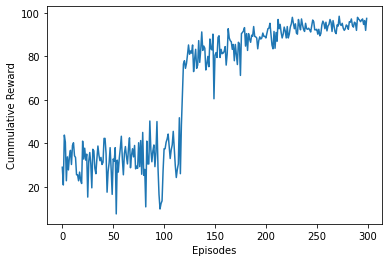

In [70]:
reward_plot(r)

In [41]:
r = [32.48008586269287, 29.474097173709392, 37.25566206295731, 29.21245850974694, 27.681400566312558, 28.174208376395693, 29.4110179047175, 23.880996724784083, 32.632308032171956, 31.8790147260564, 24.876833894863918, 36.882048313873746, 32.10425711576287, 31.105993492082604, 25.84361666609923, 36.85218010422926, 15.328494421653122, 27.075019258520847, 19.078716937563886, 33.085338025057645, 29.84673351465843, 28.332256852622823, 40.59050102441715, 30.828391968580362, 33.33075975234347, 21.326045010354672, 28.326106007224478, 42.33185034517787, 31.07221687904419, 20.81166990256568, 29.319126993651782, 46.0741122194032, 26.31392599777843, 30.57234893175411, 24.07187983283618, 26.073478460497345, 26.572490764429258, 30.822497660089265, 39.82288126138424, 26.312423681257485, 25.568706818897315, 30.321543109501505, 25.8144789457517, 36.56587471374876, 21.309138869467443, 28.560038761497218, 25.06893915184836, 33.81600056904965, 36.31734269130986, 31.563504358489496, 19.811536417443115, 19.810356214316347, 38.567690553676755, 30.806205892336024, 35.80669388513885, 36.81213056157361, 23.557660330170954, 34.30987044745748, 29.556842968999966, 33.80487098595521, 24.5555049875858, 41.05224775086515, 34.808704940613836, 41.815740327018716, 24.819522241335843, 34.30317976226179, 41.31511842295715, 44.06135975033815, 34.30981188009613, 25.306957260028614, 16.304107356848284, 40.55654533058206, 44.560600859616294, 24.56523091196842, 27.81375791917522, 34.30915491632074, 18.307352846701892, 26.80588006704955, 26.557169769636015, 44.05670930413716, 34.55614132219247, 40.810272794021564, 3.5542708127953766, 37.56206018006808, 32.80914913268728, 26.558060782748836, 45.06637093005407, 37.81704849073083, 31.55786548232517, 35.3115750124549, 19.81395311594855, 23.79911504573278, 24.556581762339217, 34.30434303375481, 37.56233630596477, 50.31659531394785, 33.31931744919777, 22.05363169553111, 33.30619225405865, 28.306858120726936, 36.30554187277231, 42.058017824202, 22.308407947749085, 29.058725797122605, 43.5614068574393, 31.056750969228283, 23.80236058734967, 33.80023803934474, 47.055360451186864, 26.069145931539797, 42.05342686464864, 33.30165864416435, 32.05235519849922, 19.05494234124082, 46.806095728007485, 26.054280043865678, 58.56148469473321, 33.55475403621387, 38.556679529747456, 33.803494076805194, 28.80143539778456, 38.30832092162239, 43.30145089291899, 32.04988830235983, 44.81529309192777, 29.572070522307516, 51.298981822034925, 35.812015913254214, 22.558191186323512, 27.053055660247104, 20.300703520140043, 35.05621569902756, 20.551892282187147, 41.80536545601218, 27.312174683584136, 25.804574103572023, 44.311684463628644, 44.55686646101888, 28.053467767973995, 35.80245860153099, 41.0548999839909, 37.30745759376378, 25.797438272318903, 19.79784326862762, 7.799473058017041, 25.05118607872408, 19.79790410724505, 17.799974190582244, 24.556430720656735, 29.554592502899137, 19.30045577952394, 25.046695432292864, 35.304382896104826, 48.309109570068564, 21.299760936536345, 26.80775002004915, 29.549379194571802, 46.05613574000619, 39.30663830171431, 37.560068773776116, 45.81012243230079, 33.55355144623843, 26.064257821956776, 38.81166804664449, 53.31539093705469, 36.06318361480293, 16.311824278915672, 37.30795600164369, 43.310263352824826, 28.058831383850865, 35.81515691352265, 39.807010089886425, 57.30850943557787, 39.05552130356084, 32.8153428026926, 26.068109094451895, 14.563035945880173, 50.81595256339295, 31.066151188565343, 32.55884208765312, 35.31630423985502, 21.812881501556735, 33.563425577918466, 29.306825417931393, 25.054429774079807, 26.05661446206142, 26.808478757727602, 34.30863513143931, 6.810746967726083, 30.05672167789416, 39.31589726573933, 21.810219237587244, 15.801137782842392, 3.803387987770847, 36.085186963802244, 2.5695220596110704, 30.81554844775167, 46.31222569778119, 48.815133218516145, 40.57258226578883, 19.316020890035176, 31.81542372748683, 39.8090972612637, 28.063894488170376, 39.811388578939315, 40.310407771587414, 52.308017956852545, 29.562937831404184, 35.3153965036929, 55.81183786939032, 54.06331752444095, 53.31405303839491, 46.06131333279529, 49.31346851511244, 36.31065022464412, 34.80949514962112, 53.30185870589213, 72.80589218984738, 51.054176015725744, 67.56382614438215, 45.06096520744312, 34.06719165415783, 30.563866661454725, 52.55972307557173, 40.55959389027033, 40.56895042220985, 45.811797811920556, 61.31764639788775, 69.56734920333986, 74.31396101900255, 74.80808894229972, 84.30839850283016, 62.81117962931757, 75.05816107898407, 74.06075880635869, 66.82372368585688, 47.56995243347439, 53.06323719390307, 24.57166000240215, 30.56763747405536, 14.308406452054065, 36.80965860117545, 39.55339262814954, 65.30163302848305, 66.05245145581343, 50.046998998601225, 70.80294449653644, 75.56177885572716, 27.538334021303072, 43.300308698277696, 13.071249726055798, 65.81606828123407, 85.05726345226549, 81.81680401269328, 59.061781058079475, 89.30691310222001, 81.55953139116322, 65.55351369153793, 93.0590322198306, 91.05812143727655, 63.558116406314056, 87.56142170729076, 94.80144722015727, 81.05056042963858, 84.80018598162069, 87.80003789009011, 92.5527364844607, 83.80402900812553, 52.04926005153881, 71.30320123266691, 89.30093091565278, 91.05211840133045, 77.55583622872719, 88.30146912162579, 88.04837329880392, 98.05042865674125, 95.04910169563914, 84.04992792786324, 88.05417577490721, 76.54921901652365, 90.8026845261539, 88.30492616123537, 91.04825353814796, 85.80365533560486, 88.8049564214705, 91.80076507017814, 90.55547220317905, 90.29918863060865, 97.30182479581806, 92.32114860849124, 92.56053752230814, 89.07120158089258, 95.56246270739231, 89.55916923212084, 92.06513442374582, 97.55717314249665, 91.299048715444, 66.05743366667112, 76.3001752677301, 86.5506048486863, 94.30147042045436, 82.04620555343257, 86.56150938063821, 76.80504994645801, 50.804881217909305, 56.80741174250991, 54.05016705453494, 70.2980498371793, 75.54681330711053, 86.04911194856233, 86.30151424313065, 94.3006140686381, 92.2992254425308, 84.2970682278541, 84.80034287335003, 66.30133542214729, 51.81187310673506, 72.29632166977719, 88.79583066064134, 92.05824889299737, 40.33864049827086, 75.55573448036513, 89.54776195034964, 97.04400554123966, 93.54755159786288, 75.30060201656737, 96.29184008223604, 98.0428818779638, 96.8116037579723, 99.31240248235592, 99.31172693419899, 94.80724993354599, 98.31984202883136, 96.55962382060386, 94.80800299139085, 86.56089505529464, 79.56750933753817, 92.566097904047, 96.31800806908923, 95.56105849346409, 96.0588143434053, 90.81454860430901, 97.31673259079706, 96.56447288824072, 98.80959278508989, 96.30914502411198, 97.06391452983007, 98.05746587553827, 99.06197616482802, 97.55112219255165, 89.31484020709553, 91.80857231230854, 99.3111788513303, 98.55468134537116, 96.81185789166702, 95.31139089951111, 97.81543265885453, 95.05993608293457, 97.55971758114694, 94.81656340875425, 95.30816736292459, 95.06393400777539, 98.3106205598431, 97.81048531943634, 98.05846582362773, 98.06246692269158, 97.80804179800127, 99.05628896603335, 98.05388901663089, 83.57535895581752, 96.30874892688892, 99.05734914960885, 95.3082543648804, 98.05922397038852, 98.55776172831112, 99.30807622289232, 96.30487726597822, 96.55810963990334, 97.55823807170756, 96.30481495098196, 98.05859581849484, 99.05534642771016, 95.55771507244097, 99.05547434018716, 99.06129200152654, 98.05449654007809, 99.31082988005572, 97.80542629745331, 92.80564828058195, 78.31286004928033, 88.8156642697802, 98.05193790726939, 99.05710169825372, 99.30543889939396, 99.55884960717235, 97.06017058552796, 98.8031099277062, 97.30291783473628, 98.80560156286128, 98.05541605400853, 76.06368352563076, 86.05799548577282, 98.05511060086054, 96.30777585087706, 98.06201359947971, 97.3040570868571, 99.06164134151155, 94.30687055241319, 97.05496378675085, 92.05696424853927, 98.55987092897121, 99.55401666725864, 99.05124649581086, 96.81049509677733, 97.55576583565205, 99.80094023500014, 97.30750601841905, 99.56080724468534, 96.5569990481949, 99.05906577529099, 99.30909300825972, 88.55574077055424, 99.81223695269334, 96.55767499124433, 99.05478331216148, 99.55732296955122, 99.55979729783945, 100.05227131771203, 95.80673119216983, 94.80499553568531, 99.05751558310504, 100.05347068362924, 97.56242055990558, 98.55698232725598, 93.80380009277337, 97.55523499905081, 95.06076988436936, 97.80528346476468, 100.05662819545437, 98.55765794814872, 98.30769299933128, 96.30925397242137, 98.80446000305662, 93.30921635705886, 98.05527326957098, 99.06256190007163, 98.05761439383507, 98.3054603229074, 100.06031139570547, 95.55755638748855, 96.31191297689841, 98.81128361995393, 97.06073695109008, 98.31039751372943, 99.05894932659365, 99.05570224091815, 93.05806639925034, 58.320838557222935, 98.05675497804498, 94.80790509777168, 100.05936150036821, 97.31128702107166, 98.80781991104251, 96.55679870907262, 99.8087340643623, 99.80452839039987, 97.8057270114961, 98.0551066158565, 99.55796129109596, 88.56079600333649, 93.56407733199065, 99.80690019147919, 98.56197022079525, 98.80997149607116, 98.5612227344222, 90.05540984834947, 93.5612347663471, 99.05596624402237, 98.80950919258132, 99.31088072370599, 93.05725796464449, 99.81060416005315, 93.06180805728728, 94.0613838606183, 86.06111207194047, 95.06071499587212, 95.80774356284617, 97.05780544554632, 98.80955896927074, 100.05993372538204, 97.55919497701095, 97.80606278381381, 100.05330798303568, 77.31830437853306, 90.8042930366071, 98.06162851962526, 100.05796315984375, 97.0594006408301, 92.05679611298596, 79.05705328370341, 84.80834907749541, 90.05821074939458, 79.05784921039844, 87.80714518148146, 100.05510195588597, 96.05742193250343, 100.0576948023175, 92.0549297233773, 96.06532659898053, 95.8040392431262, 97.56089092648737, 97.8057319081293, 98.05625170432872, 98.30786235798475, 98.5573016944085, 87.30805249951234, 93.30384024719686, 99.56095807413107, 100.05628168451649, 94.81013721620533, 99.3079355848451, 98.05319020039056, 91.05807480082453, 91.31019767800667, 82.05454790283898, 93.05842975613851, 97.80545013190257, 91.05601234721168, 87.80913764141744, 83.05980400482431, 99.55824692708892, 99.55736063386286, 100.06018537841325, 91.80576613876634, 96.05869628765271, 100.05596467875523, 75.30506261078287, 92.5594672444518, 95.30760446860884, 98.30717617048826, 99.31072327889925, 97.05340788619094, 86.80578045766899, 100.05847507795875, 99.05353604592864, 100.05859788756001, 90.06147107679901, 99.05707577415694, 75.05552683757548, 99.30417948007306, 92.30369846301052, 88.30212430005425, 92.30856914176174, 100.0594173842253, 97.05523841411117, 97.06282619756506, 99.80835523185125, 99.80872827980502, 92.05831263037908, 95.05978165008537, 100.05878410576115, 100.05777643510065, 99.30653788064092, 98.05890187088521, 97.30822104178763, 99.55973844726955, 96.05762973588581, 94.05821053178084, 100.05745577863365, 98.05663121178348, 88.05522343918386, 88.06229407821323, 98.55694990161005, 94.30360161046698, 100.05862800822663, 94.55620877109473, 94.30851837301852, 96.30886837341464, 98.06000197391657, 100.05857033628932, 96.55812166128894, 95.05899222866981, 93.05700313115852, 96.05670441593428, 90.05385348180825, 93.05422815108804, 99.30616050084974, 100.05693714954624, 100.05701700037334, 98.3130276064442, 99.55954322455244, 100.05993569862153, 77.05645625599281, 83.80761491714257, 94.05274070905857, 96.55621188080296, 95.0607946710425, 98.05749796960802, 99.06013745526487, 100.05771199371294]

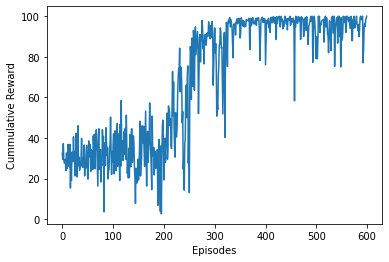

In [42]:
reward_plot(r)

In [43]:
r = [-13.453004559416883, -9.471158526674275, -12.70892704431357, -18.713163988245547, -14.964120040058605, -19.71124145329227, -27.215338052738353, -15.46168802629914, -16.462044556124113, -20.969188636562713, -19.96888150380318, -17.71905294009823, -17.716625313966865, -26.71624013367421, -12.966677768373687, -30.46545994127188, -37.47280368329668, -11.466118499256623, -24.205068782839447, -26.724008418718455, -11.709103856481004, -11.464285199560234, -15.458777664985812, -30.71762024820874, -13.946835746363899, -17.700846529430297, -13.706174959251005, -17.19764061972554, -11.203939305182802, -25.72226416958643, -19.211525404411333, -5.4563582839152245, -11.463772284321337, -13.958709918930897, -15.194842886592248, -23.2077464997284, -13.215441588690577, -10.692352836430336, -19.217627415962465, -18.19556981816705, -17.221080297197304, -23.95433710179256, -11.961883372437288, -19.959105145681647, -17.460312121929206, -33.716479475193175, -12.70063035314519, -14.694074361885741, -7.202241744180991, -21.707572337295623, -14.205437318115488, -13.70409723436293, -3.4473868043146374, -16.47254337786928, -29.72949976207837, -34.96543267649588, -13.472621198032577, 1.5456473816622944, -27.217064576763047, -16.722493706244325, -27.46524571633468, -15.966170768780298, -19.705774772375698, -4.707051886105331, -18.463335732398072, -22.71098666046104, -5.212333077565893, -5.469808842662494, -11.218320283682994, -19.717538642865705, -25.2265632259014, -23.963800153600257, -32.45560338405318, -21.9531639871681, -24.465811138552564, -25.44643249194526, -18.966792076872167, -17.71428033268431, -30.958270296609328, -9.209070045334675, -19.221763927092006, -12.706224498943266, -26.70439799216885, -12.967740411465801, -15.714706012158684, -23.96392593837234, -23.96753573236629, -11.215553401689665, -23.44801462154968, -11.709886147527044, -15.223490711839771, -13.722240701726891, -14.218139850605288, -21.72611977908175, -20.960690589297243, -9.220043710357666, -14.212364278399866, -17.976405310166463, -6.463385679421311, -25.701970741914547, -17.942526654719938, -9.716434914917462, -15.690616999748451, 4.799313876385402, 5.28462288024942, -28.976848755607527, -16.96742341950111, -7.712074185045639, -28.96405208307426, -1.208686563363965, -25.46679817462782, -4.460782980747098, -0.715471250423034, -14.469087679161365, -2.211844949447639, -8.213627412210949, 20.53602808456052, -23.72293994922404, -27.962068012651613, -10.46912418151109, -2.2063597905517107, -16.464582345045354, -9.21914637185438, -4.465134830858286, -12.721819881473106, -5.2121947918460565, -18.704411600029992, -12.954207191938476, -14.189506239455422, 1.7868408679256724, -11.4772494815973, -13.71977208868977, -15.218933851191426, -23.974466426835818, -8.225889833846889, -15.969949566615144, -12.71768309827184, -4.465031082701675, -11.47778860556238, -7.964236221699016, -2.4694955003671772, -1.7221938176300498, -2.7137890724626934, -8.234344842309739, -29.98095823905063, -8.981655786839454, -16.22142484391822, -0.9849759958842499, -2.221950610055199, 9.02170964096074, 1.266780330363095, -8.228887337388997, -6.727346349271253, 13.525517308288187, -11.980122968888464, 3.5187462808081893, -9.232937602197097, 18.01340359846642, -2.7394033797533712, -14.73665720395372, 7.270610187800724, -7.989081424436172, 2.2652873998680922, 5.016004493694411, 0.5219419309684428, 8.776372782873901, -1.9753624399292522, 6.0303721943395105, 25.038045213917368, 0.2781920066925685, 35.026225319615904, -3.4764101933413043, 4.779892441179489, 24.76610960094285, 28.521398849001258, 27.510143045623852, 18.008993477083557, 34.76177189974357, 31.50645558289314, 24.762374359515867, 27.012685842480554, 40.26143600374667, 7.257981883052314, 41.507823005092206, 21.508273262921684, 29.01006769877677, 25.01799489612045, 24.513653476781787, 27.506665166646858, 30.755198742991567, 40.010905313243434, 35.758461292588564, 31.007469822924556, 25.014048000948574, 31.014124947075004, 30.015509047646663, 29.258630211625984, 32.01224898972288, 28.76325528201226, 27.263643595504227, 22.511641403538615, 41.00618524666432, 42.00706415617491, 31.762563498593742, 28.762056062938903, 27.004933856377725, 27.007828431250736, 35.5140507424553, 30.01265696204009, 28.00719271293528, 31.508659260962972, 26.01401550269639, 37.257525220180945, 34.00933336916159, 32.25481028096095, 46.00740605239346, 21.257012389663064, 35.754937558990406, 31.26077620074242, 28.008379653767385, 25.0109250846287, 37.00473891138422, 35.008072942889534, 36.25690006176274, 37.75658015985689, 49.5055789893819, 44.01252465098225, 40.00591912890933, 39.25874140412728, 46.25883924068954, 41.25934699281694, 19.004331984148095, 24.007218616438152, 34.006412013752346, 35.75735735492544, 42.262085290807434, 34.75815942831574, 35.75757214195101, 45.00749329989416, 36.75455729898837, 30.005280835356395, 50.25891508725188, 39.25685670382541, 35.257316728021735, 52.00436718075236, 35.00875395023751, 35.5059306693823, 36.75540565472269, 32.25760898842779, 36.50443074552221, 29.51662830546784, 42.50759037978673, 49.50438506244617, 38.004239670194174, 44.755111608908464, 37.50753235004668, 31.003838676363507, 27.505454608921056, 33.012750201110144, 43.25404257316817, 40.25469649166592, 30.75377308604158, 34.007531988993556, 45.7565417462155, 41.00314543238078, 32.76418411323456, 38.25932703802652, 42.757221321055404, 40.50359443735032, 44.758040440423606, 34.50450081158846, 39.75759345347659, 51.00626119029545, 52.505809571215934, 44.253683024222155, 58.50406841147769, 62.50571635295311, 56.50791648471419, 60.256292812883444, 53.50343085176448, 56.754528627649, 53.00296761046555, 45.75424318440563, 59.50436484064119, 55.75657699584051, 58.51057710069496, 61.257020653730976, 61.7637302414306, 55.25674694084755, 76.00668445388527, 66.50514722910003, 74.50469996761514, 61.503967566882785, 52.25431741376957, 61.00734554165926, 73.5040392819909, 58.757386346995524, 58.504671727563355, 59.253634467186835, 57.25418144344072]

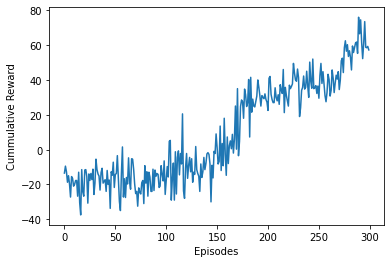

In [44]:
reward_plot(r)

In [45]:
r = [-8.707050036567015, -35.715846929808386, -5.955618342780547, -22.95332719119544, -25.20298123197875, -29.702906681659325, -20.212195841746894, -16.458910758005935, -28.961393947760836, -21.961780785268147, -23.2160783413274, -0.4604275112686014, -21.95706822339559, -23.958499790299996, -6.443681921200661, -28.456962281391114, -23.229511918245716, -10.470040225716295, -24.701009717399348, -16.96092967356448, -18.717169041133133, -12.96299622650017, -11.690251130465965, -18.21194763538043, -8.703860344529375, -27.45799545356993, -14.699816916333836, -8.94234029579579, -13.198100009599774, -28.220678455422274, -28.716059850765117, 2.5432360240393184, -18.95792442171214, -20.468872498461742, -10.46750313086787, -10.954701681161593, -17.21094728862913, -4.701651697872697, -9.46924625103578, -10.217715568301502, -27.202357665563365, -20.710786248140302, -10.205346465214475, -13.203987821466676, -7.708408057363496, -23.967830951128146, -22.962497037536103, -16.203528076062867, -20.711611077628014, -17.97103827751897, -10.216627882954688, -12.716320926134545, -15.210198508680026, -22.468835217841903, -33.72035667762593, -29.959331735892103, -33.96958963566385, -9.705086129052384, -12.721158422480089, -19.716467882864762, -19.967961464371122, -20.21774921821514, -23.20866818747854, -4.965840817194006, -11.46069740974475, -20.968041935857148, -2.7074802312258166, -17.216849357353833, -12.948826688945697, -35.72253092657519, -23.21276248661175, -13.968766078673381, -22.21163862662648, -4.707082561694717, -14.468478054519093, -24.462263326450973, -29.720980411491038, -4.716975979843637, -12.72210172978846, -15.223229040273823, -9.213226601564019, 2.800752474987326, -11.22074563319694, -12.19542901171834, -5.219032462398209, -6.726606154524736, -13.476702735046045, -5.210979973237947, 4.031343875481204, -6.711169526500984, -12.476656286814684, -15.727512604064025, -23.461516161635092, -38.21406875871148, -1.715972147324795, -14.200636781193149, 3.279294780490668, -3.9723619306728835, -7.476002526941381, 0.2934992426797607, -10.454936999518509, -10.961152407159434, 9.285812373166316, 5.7859544224157915, -3.9725158981418653, -7.475923655866221, -2.4770330523709143, -3.7188171418699767, -9.472199413949822, 2.3052341562093708, -19.21118018143069, -17.72182088485601, 3.7879615564787867, -10.225560305289052, -3.9586851114900647, 4.777045320050876, 11.527684041745529, -0.47289330642275873, -10.712129586321513, -26.96434794509257, 6.2764372761493075, -2.221941345325156, -2.466613646638933, 3.780645111152852, -2.718045010091774, -0.7128736482615772, -29.19023797636041, -27.934809621657504, -7.17210344539569, -5.696827302828089, -6.971795809826377, 9.529273901103199, 9.029481790585073, -8.974211221245275, 8.528158574659978, -20.673558772224787, 14.017195316749495, 12.758406301588884, -3.2349472718947996, -39.96730403961847, -22.213072401410447, -3.477795041377325, 20.015770365253122, 12.26590921238331, 4.264284489382291, 2.773446628235652, 16.510546312801296, 14.26101303971637, 18.75898654360884, 10.762949584925357, 9.754554189004605, 24.51367617935067, 5.01040107288892, 9.010563423564443, 16.013392658077883, 7.007533419210221, 14.0289308672923, 26.783955198494954, 33.53557686467687, 13.280175043124565, 33.7822314261583, 27.541283204807716, 36.28638329927618, 41.54093885833369, 25.041551509214997, 24.039489635387426, 27.535122154572765, 26.284142215161854, 45.29256684702674, 22.78559861099404, 47.04691548845453, 20.28680268719849, 24.786407258030398, 25.787696209641208, 26.789489708236765, 37.544686157160974, 10.031228463697085, 21.034894276956784, 18.029252064661115, 26.532807755612023, 24.283107477974827, 34.536990611088925, 19.03197224008901, 33.78835649014324, 32.28699031187801, 12.278773756185968, 22.035296888176674, 20.53467769909463, 23.281869714153252, 21.28420730867728, 35.03826667682297, 42.53716100838259, 21.781230162933635, 13.534309321563192, 35.29011632831719, 30.034293642369484, 27.53439537833187, 28.782713960760063, 18.284997281383603, 32.54346460824183, 32.787722258003726, 41.0388310335622, 31.53811465816313, 29.537275489900033, 31.2849767417139, 25.788541258085573, 36.78820082270081, 43.79198062136413, 36.28817744676279, 27.28609876706394, 32.78760067286563, 18.783123343181185, 30.533684432281362, 33.782069098610634, 21.28181082919232, 48.04019554709042, 17.030128172743122, 30.035151873786432, 18.03011002355004, 28.034918783728063, 30.53588946061034, 26.033302895400645, 32.53429805311746, 30.532786767581683, 29.0341408398947, 45.5358357055332, 27.032715105581364, 33.03653346280257, 49.0411327049799, 44.28641359079627, 42.027248615733555, 28.529774831823755, 36.760569705556655, 55.258626811281765, 51.508553874097124, 62.254983484764324, 52.005652768143975, 57.75736032962745, 59.26152967413476, 56.51369193234927, 49.50699393484218, 65.25939597143656, 54.00535109584496, 56.00563452255153, 69.25578175533143, 47.75582379647182, 60.75620986643857, 52.255758333886355, 46.25367278982015, 53.254247930986864, 48.00599886126141, 49.75875397557451, 56.51427215936922, 55.006100205265966, 56.26269709619271, 53.75403520182495, 47.75432736590208, 53.753944907740205, 50.510078100243156, 65.25519613034675, 56.254338230408344, 45.256101834223784, 48.755344804193456, 63.75477379390318, 58.758281925326784, 54.25719069522843, 61.004124976472106, 56.26040058821281, 64.00326788182039, 56.00701473279222, 40.75715947928346, 52.259154979584864, 45.010881684887686, 53.507473901052094, 42.00722101991817, 57.004997145540514, 60.50631380890739, 59.50546342915942, 59.75625160475643, 47.25396791789697, 50.27142833576647, 55.253044416191905, 43.005959637999574, 53.255571093371216, 54.75818699616471, 60.256369050482256, 61.25371225589213, 55.50422692865936, 52.25410522156039, 76.75840099851297, 68.2536489849305, 75.25340086097636, 59.254437688311974, 61.00359578015613, 59.50656938460486, 79.75396152006999, 53.75374343848068, 60.003943185205515, 55.75519911529994, 52.75292821845942]

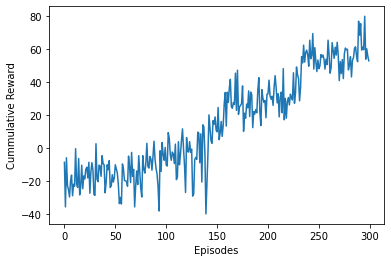

In [46]:
reward_plot(r)

In [47]:
r = [42.59887476711972, 36.6996565185351, 34.25389751614961, 37.95908517883724, 29.938384432951274, 37.18677822864778, 30.393882356836205, 40.142861145279106, 38.87105957379969, 25.12620610442804, 22.095695460675287, 37.35506915327356, 30.370951409958764, 38.86201985102528, 23.84804226346918, 31.3413956942483, 24.33858936346206, 36.59249457707076, 15.837628097631402, 32.586005735093515, 28.086542242083663, 42.84032253572481, 29.82848631995989, 29.580323707808727, 35.3439900778384, 34.3253249541718, 31.57879067197738, 32.82587168592777, 33.325204328853346, 20.56847031494614, 25.073937770170815, 10.812839196416606, 27.32870678222963, 36.07507417828992, 32.07268524230482, 24.572804159927415, 23.32342539694325, 30.325270484549407, 31.82406322179218, 17.063453857156066, 30.063748584743635, 32.31751259192579, 35.82374032895644, 30.57712070284838, 30.816237895906788, 13.565723439201497, 34.56414436123712, 35.318845819298105, 37.56388642046076, 29.815406770286312, 27.31904164126465, 11.552677620263049, 36.81799689982614, 30.816021162535737, 33.06596262927642, 32.3091476888795, 29.80854335608965, 24.307389052628455, 13.553191515042894, 17.804940300852902, 34.31213888830014, 22.812244389338005, 29.807709836898326, 32.06212199243236, 16.55529368959697, 26.308976214437447, 23.561195213612507, 28.813883040441084, 35.81706136500545, 24.808806606262475, 15.306208411040448, 22.554918241740086, 17.05671930459184, 29.813738943472828, 21.059106452021894, 36.56199043442542, 26.81016630770206, 27.056375583784195, 30.556436291676405, 30.05738904154552, 32.31103238179606, 20.30338257961409, 23.302164811344433, 24.808133168631233, 37.55851148549016, 37.0545446355343, 29.561749527570484, 24.308150028528893, 13.31504951342892, 36.06188886615889, 42.063617510473286, 48.557300231573926, 40.05360235134625, 18.05069474662786, 32.307273166512324, 30.554095540834084, 48.8065046738338, 44.05629050616228, 22.810329348532314, 31.304597540886398, 26.307163898004777, 24.55998936221464, 12.306466670028133, 42.064934090489224, 20.80365365495536, 31.809208430723572, 42.311968807890665, 26.557593700570795, 22.561910840383, 28.05400728855411, 18.04900630829436, 39.80811240987348, 30.555975032920347, 25.557226149690756, 33.05345325553055, 32.31066166700162, 28.55484959555905, 16.809179496182562, 40.553546521787815, 49.052580694743696, 52.06252193373981, 45.81024571569247, 21.319037691664537, 54.07095014527074, 82.55623803493658, 79.55648056534109, 72.30698973019287, 65.55794937745932, 76.30115302702217, 73.30222365726364, 80.55352828706874, 66.05286158612618, 87.2997150174399, 79.8005277438639, 78.05532275069105, 77.05374228679308, 75.54856894399578, 70.54623467343296, 81.30311840952918, 70.30524323908585, 84.29549452072867, 76.80129870421231, 80.29741131658326, 80.06201921548771, 78.06015983523766, 84.06630564093052, 74.56094603999172, 78.56248383230297, 79.06079975990713, 79.0601880319426, 80.55554712510825, 78.55611023583236, 86.56274962921697, 79.05762458916323, 71.30270093189957, 94.05494884394977, 75.30688884231766, 75.55969349042871, 87.31014667896024, 90.30644778869436, 83.55487242311533, 82.8082515317053, 81.80730004967329, 85.31113891500492, 85.80629249060492, 85.30702843956118, 89.55950834327433, 82.8056360695253, 92.56011240548746, 88.30586441334104, 91.06203350124228, 89.80639317147893, 85.30695286039015, 87.05712208878195, 90.81129691181266, 76.80757299136951, 88.06253161404686, 87.05597434036824, 86.05624098534106, 89.31220153431684, 85.05650051341748, 89.56151329835149, 87.31093320660757, 94.56012728920099, 86.55384792790055, 91.8079092839801, 82.80379720722306, 85.80394572400208, 90.5610671657065, 80.3070669469736, 84.3090248960723, 85.05974555236467, 86.3046806188169, 85.80780089527019, 92.55844221205693, 89.80797267231087, 90.80705201030078, 84.5565694874313, 96.55963633647544, 82.30736852319973, 88.55335191407784, 81.06080303442704, 89.30732860901696, 87.55755223457237, 92.5609997614693, 87.80844722116994, 90.55985350841057, 90.8031149234904, 91.30772622902997, 88.06268567213033, 79.05440673388405, 73.05601068683134, 90.30933174655777, 94.30680954939079, 92.30860679484843, 91.55886903244568, 90.05749407295048, 88.55954554225929, 92.80900674602002, 95.55951594337515, 91.31332295611577, 92.81037512439156, 92.31059147722615, 96.30764589139979, 94.55832966803018, 95.55462911883352, 89.3058352920226, 89.80694299601132, 96.80562923834393, 90.3091751567803, 92.8072784285923, 92.30537811636236, 92.30342852874955, 82.80547109833773, 77.55849276157137, 93.30877348384567, 93.30955096237201, 93.80769722469195, 97.3113689516292, 90.3075659242891, 85.05695371519371, 43.823737701684166, 42.05473025618454, 27.06532232274734, 31.072168206337967, 15.542120132782873, 12.048771136624419, 7.055536079990967, 56.555369038820224, 86.3071606137351, 93.05036923034362, 93.8077024819583, 90.56238204100232, 92.30467956919892, 93.3074740983375, 96.54931949481607, 94.79644349227246, 92.54634219545625, 95.05330986989685, 91.06031019281153, 94.55673782188214, 95.3034724620552, 91.55969034197082, 96.56284326359457, 90.80020415500704, 96.30206811073823, 97.30358742737212, 97.55833606343673, 94.05944507859947, 95.80284108430416, 87.80208384429848, 94.79751967921973, 96.30766234979237, 95.5642073049253, 98.54623643626635, 95.80487985321999, 92.31434217685437, 97.80392490197883, 96.55580501692695, 95.55842448297784, 98.80478644643777, 98.79706077902232, 91.30677043299193, 98.308998142866, 94.81333096007124, 92.80513040423281, 93.8089153333627, 91.56029276980088, 95.05619311129061, 96.30522189478596, 94.81000960434237, 96.80785512541571, 98.80978511746298, 98.30280101443728, 96.80811860883364, 92.80711847400703, 93.80923826151809, 96.80727685495786, 96.80679137570826, 97.30797546603364]

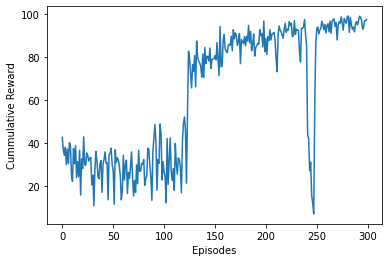

In [48]:
reward_plot(r)

In [49]:
r = [38.404311518726644, 28.887665943842666, 22.641997409013552, 35.17243322885005, 26.684186442102035, 22.1746477186277, 39.480634077269315, 35.15116485124536, 34.38231904349267, 30.653656618197548, 23.903327789352307, 34.88905692610032, 34.42624609128508, 49.18938332144521, 32.12684254774215, 24.134728434474383, 38.46015389665726, 19.609672949418655, 28.916736323074204, 23.89311364146475, 34.16710277599664, 34.14023861379537, 28.913818279537633, 29.36296467004636, 50.127497339459616, 32.63444584124684, 22.37830706659145, 41.93035492390819, 44.95771473726474, 41.681599302703475, 31.178418833579723, 26.37548037544281, 32.88722099200697, 37.980110041531056, 35.1499534376781, 31.10576776898068, 39.45220861273334, 24.90196547377721, 24.625985689597552, 33.9165407871403, 37.39080966440914, 43.919032457974694, 35.38593333785987, 44.988694265464915, 31.201018872077995, 27.367305039816262, 28.641002003481177, 43.40786450763445, 41.39189259266424, 29.665776580760223, 20.240353061332033, 33.9300083696574, 22.404236310079092, 36.89818950826006, 32.11453619487236, 21.861264411212705, 36.64513003025335, 35.88608156004989, 18.671295456639232, 32.874065131204404, 36.16121963609482, 36.65504373644893, 32.12221590153469, 28.924412920231973, 29.880779345828255, 12.648139268617875, 24.21967524950913, 28.66293852018264, 25.894457074966702, 36.88261640300811, 40.16411402191337, 36.39154984032048, 40.63778712530479, 41.625409522256724, 24.476486788022232, 40.71795834076491, 38.938599491899375, 29.884745728243566, 43.539205057029534, 19.6624297821778, 11.14797060689774, 29.191258074439613, 38.39842866629829, 40.65338216839308, 37.7003400197539, 48.338219241488886, 55.88938675914956, 44.42684390063728, 38.627852756243676, 49.88086735632073, 56.91532767684046, 41.22420827486257, 37.44379113463175, 45.92536689004052, 38.86739287006776, 44.92877797603441, 46.17450352765543, 27.719234071904015, 34.88147519417474, 38.69483587150823, 59.93678361835418, 21.54300597120631, 63.394911897265246, 43.431312223079125, 39.711888188434365, 52.13331145592224, 46.46518666694639, 57.34487962238223, 40.69311629270409, 33.90686779380521, 34.13875506793989, 33.19634569693078, 41.703414458271766, 32.90787272625584, 17.438481737563198, 16.487266888697416, 31.50704410076361, 43.19072402848871, 31.686522533473294, 17.931592994795256, 31.003100908892414, 40.217103213076655, 29.240395123228254, 34.06221518468671, 31.277367928551964, 46.1897543204692, 38.40570401290854, 43.86114342509013, 27.902065281116627, 36.37112029740837, 8.329213694117687, 54.08524161427049, 36.60321056042965, 43.322975926726194, 43.35332098644174, 64.86949183691212, 38.43845074024747, 46.91005604727926, 40.194450360794136, 43.178220478585025, 50.71283974047306, 54.13996707034453, 52.32523359048383, 52.83173923041403, 53.86182767124637, 51.321151044946646, 56.35940246449407, 52.8695615872962, 58.394757828112866, 42.648288929073246, 48.112438792304175, 38.057588237527305, 42.87149911938856, 55.4405577280329, 42.14417308637603, 45.676288666460955, 35.43239872802349, 25.049607731423432, 35.59071054443631, 30.803000695839863, 34.38833124087695, 30.210695993385293, 64.57759706310685, 41.32245139069296, 50.58253698042428, 62.857466699598675, 37.62110889005055, 42.60100518445029, 45.295450554069866, 46.56649112439047, 66.02323009218678, 71.52230632482465, 28.790069499947386, 53.05923212991756, 62.546880727455296, 79.03789194798185, 72.57526955545387, 74.79876998099623, 78.80772730654546, 73.81506832200323, 69.07313483074115, 53.33424975078992, 72.82683064337493, 62.84274355495115, 56.61534254922489, 45.60256628187777, 14.527318720609168, 13.564226468179983, 40.34575670382891, 57.875862512521195, 63.603512015902204, 73.34225973149121, 77.0544566819797, 84.79136104100243, 81.78434134101406, 74.82831788981568, 72.2790687768543, 82.31377100926521, 94.28978235138472, 92.51981810452995, 86.32696192133348, 77.28875220952973, 85.01463864586404, 85.84461535416611, 85.80296320192538, 82.29064399905938, 83.78883080211541, 77.26149720475863, 76.85549922382248, 60.60641385526782, 74.31564479968672, 88.76543295147493, 85.82061113517368, 84.80335641126327, 82.3126513110423, 88.78337430119765, 85.31290443335062, 88.06970367461669, 82.27933683685754, 82.03042827808079, 81.29735418799922, 88.0379286809652, 81.03315742237103, 86.55429864191828, 82.5507420883846, 69.09476144460166, 84.75555442822404, 84.52681405092444, 85.77264664192279, 81.26439022076576, 82.01820484374792, 80.51284985977904, 70.54009326574013, 69.80017469243862, 73.76958431899519, 73.78385717918594, 56.321984799859244, 54.59528966859566, 15.614653973545188, 0.10337420760769245, 36.318743734060234, 76.0596872827566, 55.077600024686255, 66.06002779992791, 83.51579981736145, 87.78171652159162, 67.32434590203155, 81.040383585871, 82.77822358511703, 81.05493133750456, 88.52008001278807, 76.81389433823833, 90.77125860254495, 63.12045556158074, 78.02936769535692, 82.03099558110931, 86.80505318166391, 82.54636543102052, 72.31992391533758, 81.79554000946894, 83.30052457021637, 80.78422053609731, 73.03368894973818, 37.37587359424732, 64.5817830021864, 72.07299506295259, 44.09749909052198, 64.84025887485411, 69.33330940480948, 41.58675459319571, 55.896051620451104, 74.06628628591346, 76.86320052243038, 77.78717809034711, 85.05527058930396, 96.01390346038609, 80.82091011022138, 70.84263962096296, 72.59924992402031, 87.79550930656659, 83.05369073086064, 90.02436909381741, 66.60157209320367, 67.86668752493998, 74.26773211883994, 77.51571219593399, 80.14025666309988, 67.090723287506, 94.85783005415763, 87.59622577134658, 73.0658945355838, -9.347114161030722, 85.0, 43.038249811941945, 72.90096150739377, 93.39612400805281, 95.76919582698865, 98.50681806056403, 95.37555491075749, 94.53897997303785]

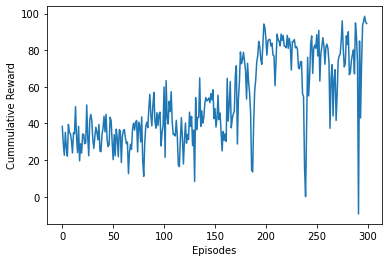

In [50]:
reward_plot(r)

In [51]:
r = [24.264559907429458, 40.35738044307254, 33.46891843971171, 28.13285422219772, 27.90141619448775, 28.71722540160599, 26.27420348915175, 34.13209026205565, 29.684499647053546, 29.69692524174565, 33.82597018748002, 37.35128147259486, 30.09924435018015, 38.07711661978497, 30.769047463801193, 15.504633493214296, 37.78598140557057, 33.04188702197697, 29.49687925778288, 23.731531385033513, 39.01400352414299, 25.258357154831028, 21.757525816478815, 27.531664389390638, 29.505132821809113, 32.27044354956676, 37.78201101495937, 32.49327918153531, 20.279675619218416, 30.017589020306445, 37.05768842566457, 32.52425755173294, 42.544241403634494, 25.26468282727784, 40.02162169922584, 40.04231355378377, 33.02527178362566, 28.499594424541847, 36.77486990581112, 30.005052790091128, 42.76990306905345, 35.98975417614056, 38.28711066352123, 31.530461647944826, 34.02153555075519, 33.241893664896196, 38.24375825659411, 45.289179885550034, 33.7455179980562, 28.489911643800486, 28.248881544313146, 35.50318694699693, 30.734568664389634, 31.509181990465382, 34.99749074104285, 43.51539923301163, 22.72441169037596, 27.73233644293009, 50.52634760021814, 40.978264594650156, 44.764471154084724, 32.009374556621815, 35.752646745200074, 31.000166892622566, 40.28775509712949, 30.759421592923424, 24.011464006597283, 41.01811986565882, 38.535410497027264, 29.78932882759979, 40.24823372894813, 29.012451902822644, 27.053943756197594, 33.28281143987639, 35.50117823509524, 34.76525853747698, 19.03101332197399, 47.26433713180381, 25.281105867153602, 41.55089590751176, 36.29848425270222, 40.283300800253144, 31.04509795651208, 48.797099887862736, 45.79533452879138, 21.992504323007758, 46.796626625526734, 34.76394137191187, 14.721615543979203, 25.260246869358305, 19.00817901238921, 41.03897663401571, 52.054436253586694, 34.07989476990339, 33.781690943127096, 43.52573988026295, 16.52052756858986, 34.56003503603648, 31.54453575777293, 37.51813835906679, 48.29003004465088, 25.501047306278238, 31.2770200700243, 12.49626871729743, 54.7673064152571, 17.296352875686534, 37.040039339694715, 45.04888586096917, 30.795466191279875, 37.052209163162956, 29.27716339728022, 35.78301951933772, 32.489750940783814, 44.752936006284294, 48.03070350881663, 38.547522777928805, 46.50298266668602, 49.03505211962585, 41.80296129943127, 41.75404030424682, 34.78140193248587, 50.08055122178389, 52.102168355533344, 45.05487457723473, 43.55211772913315, 44.3003783289549, 57.09318564369952, 44.831912140606185, 38.00191455037277, 36.753212909431355, 48.04424731482477, 35.49953590683886, 43.795356191059575, 45.57655585987495, 41.28166154257168, 42.79229638775902, 32.27334182758793, 57.90433659704093, 40.56720408059013, 39.80625613729502, 53.56495744758138, 30.2812567553728, 53.60298013619057, 11.999222707390022, 22.0537853116403, 24.03136628247814, 27.290318577665946, 47.79481395541402, 39.82107871043411, 47.05361431819052, 42.92132321507716, 46.57625959023379, 26.29490311536569, 38.76576507439604, 36.827810023114985, 35.29816648319127, 36.779529472058556, 21.037385974703447, 60.00987919139496, 53.707815951075574, 69.46749230711208, 78.82893235663833, 77.0348162683156, 82.85837149249934, 83.46591554596287, 87.43335900682867, 77.34693859856289, 39.23026056029549, 39.557075721333874, 57.79122582130036, 33.355475777899564, 67.55889488784736, 71.99802851978689, 77.96370582050733, 79.49029102587006, 68.37868070110221, 80.39053248778555, 84.42122701015101, 87.41868909772701, 73.577724262308, 80.10818712928678, 93.62220089066803, 83.53030408216007, 89.94777631013645, 95.99110474870643, 66.0470724842716, 92.25405190267716, 88.26503732336036, 85.80624904574347, 84.86021377017975, 88.34300846933083, 81.98989765512955, 86.84094322056227, 93.789116260364, 88.77150730647217, 85.41492669730322, 89.18016297103519, 84.08250736531737, 86.26446229924103, 95.09627394192711, 86.14958557243968, 88.39850809095233, 80.98473261174968, 86.22225222972239, 67.9928277627597, 89.37572019414411, 86.22805260929708, 83.80530316807514, 73.79143430230758, 78.77024646122523, 86.44442319277833, 66.74286417987912, 77.01126023749359, 71.25190219826798, 76.74136230313803, 81.77700880866543, 88.00285552055063, 83.05408351172073, 89.17381655892953, 86.79538910299732, 86.23277630136063, 85.50267079571584, 93.75749098696562, 79.54905840234804, 90.65036081512325, 82.96213339504396, 80.64348196816577, 94.25165206879468, 86.3067630009026, 91.10386152747562, 90.40967067489733, 91.97403872118204, 91.5545585843936, 87.0508909509036, 82.61436504923468, 84.34744952817975, 81.07644460694314, 88.5117637517938, 92.61265134411002, 81.9753184817717, 92.0282896090471, 95.29866208434579, 92.28156659418009, 72.31249461766461, 78.56632363180258, 75.76187496440869, 82.80718020508354, 79.91195488534856, 71.59623404177695, 69.99213344490786, 88.39111827460837, 86.41815342060305, 82.93029044608794, 79.83576688362015, 83.16632745681589, 81.63971623854448, 72.34926735771177, 66.8268243078434, 50.40055623811144, 59.002447461677086, 49.66470137477481, 40.960342408176196, 53.520178109500236, 54.83124335138973, 70.68253550297743, 81.50130252086338, 72.96786284576457, 68.7358002131381, 70.52428783267904, 72.51430853926307, 74.55179303044923, 75.02087562039276, 74.23822194770582, 78.24532731275664, 69.01015359096345, 79.25229636881717, 78.98749761294266, 75.53681517811111, 81.75754738382972, 75.05038328503781, 78.7236832884095, 82.2252521287273, 81.51130086883441, 81.9889325395625, 81.46365181426438, 85.7128538332213, 82.71585385400188, 77.20349250591593, 81.92839051861054, 52.43268816459501, 41.63205000670426, 30.616874589062256, 73.76108768914908, 80.2465705820969, 85.98734615527194, 86.73981288123191, 88.98252368162656, 57.50415404970133, 73.02870546866465, 86.52606722386234]

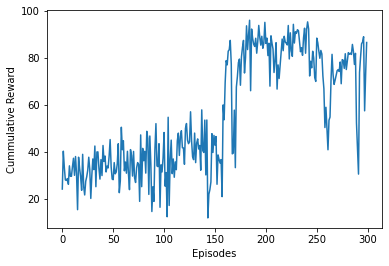

In [52]:
reward_plot(r)

In [53]:
r = [34.35397741314008, 34.419159712848625, 35.64529717576268, 30.910975605055206, 31.342209756478287, 28.88177123910571, 47.26139998173443, 35.02756975923266, 35.48737137175762, 32.72951654184054, 40.2278656982739, 30.217973958160783, 31.44304408723869, 15.160153190959749, 43.68062349709613, 33.681179430209646, 36.645311769659514, 40.68273118305413, 27.63906444732371, 35.892198503083165, 29.8863005613824, 37.8911207092852, 25.367732132462624, 41.632710411371605, 31.38468315302158, 20.85992217383462, 37.62122350467989, 29.610007559214555, 34.11340761734436, 32.8537444303828, 35.87685045147132, 35.352337627715684, 29.101206558020287, 38.61253380863084, 27.10462326566556, 24.10314182835544, 30.34965167442077, 26.34494248937018, 35.35271687398836, 33.8552174312687, 26.844202716898604, 25.84696458423119, 26.836940987483324, 27.843073693527984, 25.584917816995507, 32.097889025520566, 28.364279765155864, 34.86390378966102, 40.1002551170548, 40.36464561434912, 32.601712624055835, 35.59507299834156, 20.604013908034887, 34.34963786969704, 34.591597596701526, 35.36283529559033, 26.84414954459498, 23.84490612286934, 22.096818329377054, 28.85378356994726, 16.848106626231214, 35.1073151786529, 23.6097258280563, 37.09686647083301, 17.34819388759617, 36.59794126398696, 37.60525046015128, 25.84350353663433, 23.59356626468952, 37.36630416609542, 16.598260939438497, 42.59080272842581, 28.61314663231297, 30.851034444104464, 38.0976346155017, 32.83572191859243, 39.10964533230394, 32.869666536971096, 28.60207188798739, 21.606524599684416, 12.849706665250483, 31.098928348446414, 32.33767581062092, 40.112355497648295, 36.1010598672266, 46.60406318778492, 22.087763234659334, 32.092022061761156, 44.35012037640107, 38.34358135359779, 43.35220046606411, 20.341803154271197, 32.092516015195045, 33.341638695421274, 42.850573824974205, 49.09457939377095, 27.102200318661392, 43.09846613442293, 39.36604223781305, 41.34725547000172, 21.84920059679422, 32.34901294963223, 27.341478304961765, 19.857884859916226, 24.117208029441503, 39.354653364394565, 34.597579709913916, 27.104536903600387, 36.102320707435815, 23.364273609286467, 45.84960298527773, 23.597560197936918, 40.845491243695726, 40.357728464126275, 41.84622366103828, 48.10403038632895, 35.09256943653468, 44.84605218287114, 42.11850486491498, 38.10081915533779, 35.08828495250951, 41.09481210905141, 44.09436036305136, 44.84920645176165, 43.341157200831326, 32.58905452363511, 44.58576980660998, 39.34767881152934, 44.098639231755804, 46.34569758638303, 43.34036792798234, 45.3475194309465, 34.34796023119258, 30.343752712849994, 31.342869517607156, 33.84826720446923, 29.342634081531966, 31.85728573286678, 32.36222809041531, 26.861531219072205, 29.353088244233284, 28.595086218806482, 30.365230827866238, 45.110109980918764, 43.86131983643845, 54.87804426314972, 31.869434956633853, 54.360889080095426, 51.1106864306912, 51.8454910074862, 28.086019662216025, 43.84512806176136, 40.609454296389536, 5.336184004944123, 24.107834828696294, 41.62362200337953, 41.613886473939374, 34.86914861443909, 46.59510318834331, 34.62641983723889, 50.859908767074714, 31.115965459469, 28.621322961660262, 34.62355244539828, 71.36199010310891, 54.87154979023105, 44.14066392331768, 37.388159994862484, 39.87830914133246, 47.37965163754079, 45.6139399322693, 41.106627418918485, 26.083868488428852, 24.58610416318694, -0.4336197214421782, 38.08958386192305, 33.09018960609831, 18.09272310273329, 33.84304010986669, 52.36124136871967, 56.619030693314684, 79.63296708780092, 81.61127276155915, 87.13283921432075, 86.61872790570231, 87.87405140774472, 89.61888262065895, 88.3621941279647, 79.61114438097974, 67.36398751775347, 54.616604784515985, 72.62826806847777, 75.62473050672901, 89.62915625199489, 93.40416563368188, 90.89644062387721, 89.13921659256515, 85.37354717391396, 61.63973151114864, 93.89994002907184, 89.13176746179278, 86.37590816640896, 62.13892855646802, 71.39018121411401, 78.63851263444847, 74.37701665464941, 65.87721384562911, 75.88154795781588, 53.86074401802409, 75.37330971147605, 93.35823693141735, 60.60949007174465, 86.36206681195615, 84.61048325944914, 71.87250275113318, 48.36624408858162, 58.10836494267122, 71.13203266186548, 54.61735483050126, 68.10591015219752, 58.85870195250529, 82.8584378161329, 92.87750144651403, 96.36867225585463, 74.10879288668488, 79.86089811850887, 54.607296443850416, 34.339668484036544, 41.35648558373395, 71.86352645709849, 94.10366075116323, 88.64715860979446, 89.13266761517947, 81.1356658073627, 93.35736219287413, 94.38981466208679, 94.09053988223387, 91.11103960884314, 94.62399198654732, 93.60311697051034, 94.35919867715181, 93.616883229064, 89.09701654352894, 92.60310070267003, 92.89424358883564, 91.59749109073957, 97.40584012221127, 90.41207687125159, 98.38003690884825, 94.37297241283937, 96.36090849370666, 95.10353440110337, 83.6165553923607, 95.34475253106517, 94.37357244139282, 95.37609110784813, 94.40083037231156, 92.62375528727064, 88.84170630187248, 79.8627047532063, 89.64604796385174, 95.40717971825815, 97.68039800516281, 91.44452387184221, 95.10321772171943, 92.63047430248959, 91.4147143573577, 87.35831959529075, 88.97125205722013, 88.40331084025685, 91.41248280501135, 94.14117462410951, 88.17844409265614, 87.88573990663129, 82.60033266936104, 48.32569522492946, 25.81961303130688, 70.65124735542663, 77.86724763494843, 77.12745085093195, 87.12746005536141, 98.14671617441519, 83.6044418144864, 80.6097481574545, 75.8358401957263, 88.8853852098943, 80.613706353672, 73.33013410673797, 69.84070970620925, 85.85935643402267, 88.6379305118126, 92.86160502757035, 95.11135943376965, 93.12369095886422, 96.64364777545536, 95.62744448721324, 95.3865771185784, 96.62659186726947, 84.65326563912849, 94.64086947626912]

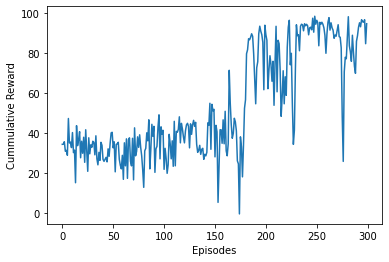

In [54]:
reward_plot(r)

In [55]:
r = [33.352325362666576, 25.90447882079027, 24.964081319285732, 23.197537100632037, 30.43307173768468, 27.920152676154988, 27.64203456470543, 32.90878502412526, 22.89122014167438, 28.618378145473237, 43.3775497662664, 37.368593559785985, 36.11716019137455, 43.11244256171795, 32.36769099147793, 23.595028870233033, 28.347092200982743, 32.84629660374602, 28.591655723139507, 25.582887386793047, 30.088261587368116, 33.840520860489356, 39.33535667704234, 32.58183791453721, 33.57351699223945, 31.57931982992626, 42.58351385446836, 33.334946036714655, 53.33754660884008, 19.072882422326856, 27.829792945511766, 37.07205838406539, 30.826044483911243, 34.07043196040249, 39.82353625870741, 30.81889042896753, 35.07856911741559, 46.077252633130065, 40.07274224142014, 19.807529643540384, 42.068359767985775, 40.07395157950605, 23.55748875645758, 35.5610311976292, 42.81375563155657, 34.55650283641994, 37.56607350689565, 44.3227730254994, 36.81655249880945, 40.057492453041974, 44.065914138736744, 39.064383436535564, 33.566067676774914, 40.56328482664359, 32.30721115230524, 45.811494965545336, 43.55937743541457, 47.31631865014641, 23.55592415077529, 47.062427387658644, 28.81373528398898, 45.05866302019411, 34.06166461443575, 41.312875880367734, 37.81048134886959, 25.311643208125854, 40.31217479998561, 29.062707430119026, 39.56325868492093, 23.54891993263392, 38.30852222651481, 41.55905073318144, 31.054875898056853, 49.56605748946498, 25.06216834946579, 29.81180503118657, 32.31290347675912, 25.80451620349341, 45.81153308501767, 28.305372854624856, 36.059450921285375, 45.57250645906329, 25.807762036204966, 26.55330786654962, 28.80095082209307, 39.56027357808261, 35.31351823823584, 42.56119919197498, 39.5655062398088, 38.31164487839306, 26.31184721552273, 44.5604137710443, 32.05927438978379, 27.056760246630258, 40.06102935429225, 35.56482857076515, 29.316235714442975, 40.80871739968312, 30.560384606177127, 43.06483508232509, 33.310244257713414, 50.81525410313543, 36.81654214784016, 43.81693884080896, 54.059163723294866, 43.313127000161124, 58.06216098761208, 33.813270849630484, 51.06311404405203, 43.81046144473432, 26.30328435287736, 38.55868243231194, 43.80804831016662, 44.06026631946737, 38.80872760401916, 36.05548057681206, 32.55103729661884, 47.06312998613025, 43.55440586855709, 36.05603096430472, 39.054477253882894, 29.810448163463814, 27.057133145289868, 37.05708977567854, 48.81069369529409, 23.553628597191345, 51.31064317259957, 48.80729225186846, 65.30827177165324, 64.05664964817035, 40.30372877687186, 55.5531347198821, 59.30181039821567, 41.05283246163467, 40.3008017569499, 29.299756905738295, 68.30989289256105, 77.0534599992508, 35.05399338688285, 50.813117048843836, 44.559022315133404, 41.809951960586304, 40.56025160614269, 41.31453312979229, 16.812799797643653, 19.307992403183054, 17.555701300773816, 23.804786263025903, 40.066235837941136, 22.05586052511771, 47.30266602014368, 45.30938680388429, 43.0524277021761, 42.05603933222541, 37.80833303802097, 42.30384841739813, 17.792536740055482, 16.545817499171484, 33.80852156717516, 34.30512355663352, 44.30936344357141, 70.31013376085596, 57.55845378802505, 56.56320685939399, 49.55764649328551, 54.80847620577451, 59.557446874484015, 55.05569002390112, 45.80859495103776, 44.80943118501376, 52.55484542549342, 58.30733191485772, 56.05916787344375, 65.80611308133187, 64.30692833822629, 39.807410231679725, 29.30364553382552, 70.55970085299172, 33.55107446440151, 71.05910446927818, 67.80782936844737, 60.05917161196541, 57.30798151628946, 57.0580737924528, 47.05650967091929, 44.80451317268372, 58.80523697044651, 40.553256419877144, 45.05662340480924, 53.05542628243857, 74.30878262129508, 72.5580361580909, 54.05711247200726, 54.55709789863694, 61.05766745317592, 71.5623058145136, 67.30686693338289, 65.5584941732577, 49.30476218805602, 69.80530839402854, 69.30492930446674, 50.55870705138799, 52.56010567355598, 56.807321421978024, 46.80504395032222, 43.55496249946791, 47.05851295689107, 41.80984747781643, 54.56120001817102, 48.560601461758814, 42.310617822327764, 26.048709672032444, 63.561211926348776, 53.55802725672309, 38.051083090295165, 31.55093904550903, 46.55154262945625, 38.058189454409714, 28.55122044352455, 13.304615958791098, 24.800794814546983, 2.7974735561124198, 35.30976048857683, 29.804791832928807, 37.04673798779254, 8.042564935854198, 17.297428542420175, 27.830116390352284, 40.06426987854582, 24.068150107021264, 16.054829063484924, 3.550820241343146, 1.807703950960767, 8.055468813871999, 22.31168308003353, 27.568936385995816, 56.32291229418756, 37.059978507034515, 41.8127793732299, 36.06650912751957, 12.061523071485745, 19.306267345312737, 35.81046960953113, 41.31410992106078, 27.816558472795258, 52.31123475974099, 32.30682611529571, 38.308042074206654, 30.81107638502767, 46.312345494275085, 49.55719823876509, 26.05432184037837, 40.56013262637207, 20.810767027872405, 53.81449739310904, 43.55326563544595, 44.067729604515826, 69.80319927436808, 76.05360869078739, 44.80648578594619, 67.05742451311968, 55.80966003872286, 62.05873889466299, 54.30961451657713, 79.05859780271444, 67.81641092799327, 57.810197048223436, 74.55518973421425, 69.05219603545964, 77.30072537041299, 83.5517379385733, 77.05036836686584, 59.547718002472365, 56.54699425969476, 45.79573406396587, 35.57404267149435, 86.54874134561057, 78.04908137598606, 64.29973416475251, 57.30096358580311, 74.29783747698376, 57.04255855387667, 72.54562496070884, 43.0447574416095, 55.54069742698517, 68.5471374929615, 56.798413261601816, 71.2954165563004, 65.04705047589947, 66.04942117507164, 50.29937852897741, 56.05888481550588, 53.30501866207208, 31.55520660030617, 35.797608944763105, 31.30216630524451, 26.539978858227798, 33.54429434454044, 21.816055582095736, 65.04708340396814]

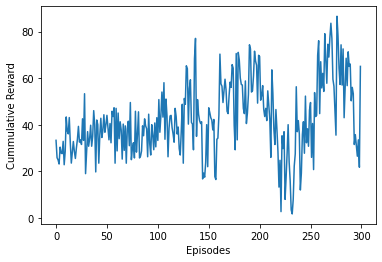

In [56]:
reward_plot(r)

In [57]:
r = [36.536855108496134, 22.81953104673102, 23.886878610602697, 31.635862971008326, 24.86644538759536, 30.614972343516477, 27.585011974583956, 31.331101757471867, 26.57823555500952, 31.318432307949845, 42.06418881073181, 33.0505378571202, 33.3098921758128, 34.06074823628793, 26.303492340997497, 32.800167200347246, 28.800211670099316, 27.294843095610595, 41.80062850723001, 35.294272706182205, 32.54955891397656, 28.293266434081914, 21.293723943246917, 27.294174163328762, 38.04531898644325, 21.543586757107967, 36.547249583270016, 27.544206528780837, 31.296490940610827, 30.794786449749406, 28.29393774633441, 44.79311455035278, 24.789374208377406, 34.54169274487784, 31.791622240883296, 28.03791640266278, 38.54730950430202, 34.0427647394299, 30.037099242241407, 30.793830524092193, 44.29680113445601, 43.28894592465161, 34.791185578607745, 32.79442879419566, 38.29165185830286, 37.040427075176176, 24.040656346832613, 25.79437963548747, 18.537378899941093, 27.789883444978546, 38.04222992706998, 32.04452411772322, 43.045133967814046, 34.29243349360712, 34.04127794374696, 36.2942915172587, 29.03809522758475, 31.54021719578828, 24.79086585053324, 31.0429276673366, 46.54046843310293, 32.546335174316354, 24.039845244906594, 38.292188151074484, 26.537621430375335, 40.7947929266816, 44.292977674482394, 23.788559483924452, 30.542809965864084, 33.29583888413007, 33.79171784105551, 34.541671349787634, 37.04287513481369, 30.29088507657022, 33.54472295684076, 43.79584448084212, 44.04367216239635, 33.54476686153428, 36.04245264793476, 24.798083023970843, 37.542607921104555, 43.047879390721064, 33.045671204327974, 31.544489288760523, 36.04534393168731, 36.04459706438532, 38.54458745591491, 24.289169800001684, 31.293631597657033, 44.293572856016674, 26.793436992039087, 27.291246621898285, 19.787127156505658, 34.54185046845344, 32.79438299768243, 38.04345803740039, 39.04243440947957, 35.04506932113118, 43.794594120528295, 28.045050855678273, 29.791491897108656, 25.043766364635022, 40.794410997952745, 34.79251802843413, 24.038949953825416, 39.296521977030494, 27.04312738421818, 40.04315803586434, 39.544047120788605, 53.79465011747517, 51.29853528695411, 36.04177889421823, 34.04197066101027, 40.29335938683943, 44.0428190258192, 19.03559234163814, 34.78714856144502, 44.04328435879118, 26.290373802982568, 30.03899804387987, 42.54282167570466, 34.79418330593179, 32.28968754779439, 36.54327157845921, 31.290715291811885, 25.288892339626354, 39.79173119268955, 33.54401571325562, 35.79131171409333, 33.036762698745065, 30.54141300445111, 27.29221079561301, 35.784804179420306, 34.788730389841945, 32.53815820847433, 24.287799999856443, 29.287605084372924, 42.03474058153149, 41.032488328233214, 39.79116111751549, 16.038266951788803, 15.544498436975127, 46.54519363267233, 26.795472885150673, 33.044591029691745, 18.04073174590128, 22.043115338084252, 22.54359817369611, 16.784943088592428, 46.294415172264394, 41.54257309174644, 39.79440325864722, 50.54316090928224, 33.79129572644521, 25.04162893980464, 50.29306866119978, 41.29047061204801, 38.29329597351119, 57.298042606008885, 44.54519858766479, 39.54239300331468, 57.04418925074445, 35.793412461896494, 46.54362811969762, 32.05011084394087, 38.54550395854744, 15.548139187497153, -1.2090918544768186, 68.04423632372794, 65.7961058432336, 59.79360316971728, 5.533039482869052, 34.03696956293282, 29.787909648508656, 56.288604808478865, 40.29183249645403, 49.29095394029608, 50.03838427757203, 34.042593563936094, 33.04620996188638, 57.55007647064572, 69.80034715339468, 77.54823691927992, 91.80023299520923, 93.79907197899425, 85.04659775798349, 92.2956874062702, 84.04642993302437, 37.03575012070057, 26.78321587483613, 50.542849131308444, 75.0426866122355, 77.54121234074904, 76.29196573334434, 91.293343266156, 93.04187622159641, 84.04069084804733, 84.54007497631699, 85.04059623362973, 87.04110243159315, 95.04162928660386, 89.79599468242611, 88.54103711825218, 85.79065292758483, 60.03526812387627, 57.284488177617646, 89.78990241623715, 85.0375761342082, 85.78903432891026, 65.53356403579834, 73.29130468507648, 90.53971938009883, 95.79037055871105, 93.03749618918042, 89.53599782739664, 94.28726812858181, 93.79323871467022, 87.29614142300584, 75.30297375746925, 74.79910579194551, 68.29806142303187, 97.5399451000011, 94.29058363299856, 89.78863810911398, 88.79026417691003, 88.54462858466607, 89.53700748610619, 90.0398068751806, 92.80264573474632, 88.04142723093119, 91.79554014204496, 89.78682709548204, 96.04228635697847, 89.04083781354686, 96.04785012460883, 95.53636074352364, 95.79095624175623, 88.53769157179049, 89.53861586554346, 92.54396445044034, 93.79023244096163, 91.79054005782248, 92.54281643465923, 94.29127401768751, 91.29222697643466, 95.78835535093928, 81.54635951437979, 81.7940676797859, 95.5518182757904, 92.53308399609627, 95.78869149653408, 95.53808218066366, 76.79063355687161, 95.78962784492806, 96.53929550255995, 93.79351792830987, 93.0414188903097, 95.53855346153537, 91.53888681298025, 91.0380754987122, 88.54351735445763, 95.29137846354844, 94.79723070001454, 94.02556923725936, 90.54309079173514, 93.7879243737393, 90.5415482440205, 93.54708408375316, 91.78358105334361, 97.78290837612109, 94.78344919068405, 86.04111840434201, 92.53130406679033, 92.78359932452884, 92.7918329443583, 90.79677909915443, 96.03996032805352, 94.04033891885906, 91.54771826368093, 94.03985459176782, 90.54336406507969, 97.54064071984229, 91.54758275372907, 95.29776939158818, 98.54444937124661, 94.03510613877637, 94.54389081996922, 96.0381333746395, 93.54079871891751, 99.29091545839968, 95.5400176611968, 91.53647630900522, 91.53753150830796, 97.79405896508194, 97.29360033421366, 97.78583464926888, 96.53656102499274, 99.78820948703164, 96.29508064092269, 98.04427566859006]

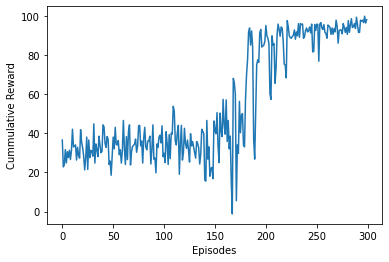

In [58]:
reward_plot(r)

In [59]:
r = [85.79273517553132, 73.94649412345075, 75.52544187422083, 67.81408475255135, 76.49306202503988, 87.58223161318678, 81.87122132451404, 78.32203998245839, 90.78823211653788, 79.0596524271714, 104.47751497889914, 56.060250099426874, 67.21749098997728, 76.89288841331793, 108.76699284348376, 78.27499963207036, 59.30391879259012, 75.44415214932981, 78.48304951809223, 71.70212675825458, 68.83655817471939, 73.85669747737619, 106.67105388653987, 73.35974649425117, 75.84050443099585, 101.2028025027802, 95.70481112313054, 66.75826144540333, 102.03187337071338, 56.35334883844719, 71.82483406296217, 76.29498513787559, 81.45925361006357, 65.68390461473044, 47.4900464596263, 89.7586565555564, 128.89747537729448, 94.18655926433829, 107.24658436792824, 73.6926550363372, 94.6296182893354, 112.2243123871617, 87.15890999084762, 84.63888495970947, 114.21627135665383, 81.99876615686242, 117.16215567622217, 46.16707750559215, 66.37253167610011, 101.50579737597653, 97.33768183772979, 57.1069235288631, 78.05556188305673, 136.7353247705295, 105.17204206670047, 99.18513563313552, 100.12234080791032, 71.47629953958781, 62.29161972817679, 75.33202123220028, 65.2700806271997, 127.62050978559091, 65.47956744656103, 103.19696770355344, 90.76045599730497, 133.7055941193153, 143.1562425858874, 101.21824084139011, 192.54683415904552, 108.41804022575056, 134.4191396131539, 129.4470652838893, 107.26756457553695, 133.44558569511833, 112.67589809584366, 122.71908907706242, 169.1761505984714, 143.84147422697973, 98.28167123551117, 147.45135656696502, 153.47065668105094, 224.7186684794444, 116.35910298736358, 118.04537503228266, 127.38787741341801, 95.07050919221086, 136.26757679154514, 155.02594755674755, 144.00687691320996, 142.53639108337728, 116.89874454388361, 182.9370346017841, 120.48049404302797, 125.63475785159973, 145.43926620088305, 156.93054149356783, 120.30750207165144, 153.29963916322865, 221.00744424718891, 221.39107796031004, 154.28659131445062, 122.60503789711146, 130.7366409752383, 172.36695390945135, 158.83451867282267, 192.52146904841004, 164.45767244418698, 110.60203051596409, 201.5401068584631, 70.83010337830343, 174.3047512639508, 146.96327127674834, 231.4555298242836, 218.772968474889, 233.30499369759139, 190.23014908303765, 158.5451696004555, 174.3038867074789, 86.99691724433953, 176.3770665684808, 196.1812162738155, 235.9402665449393, 236.44733920174642, 177.04752867460928, 245.3247016439396, 155.9128896941434, 198.72594439603662, 250.30743619692282, 192.45455842580927, 152.67971948679744, 222.3888915331134, 212.57071233258353, 212.4143689054561, 260.93929576518315, 234.89524925276842, 245.48795928216006, 274.1788567746042, 252.41238149663383, 232.56465150256994, 235.92920327346167, 158.8049676194753, 254.02267704158066, 205.2392171320265, 192.2901162830903, 261.4942637412565, 221.50318765225202, 233.37671586292942, 256.4879580995865, 252.50881695421157, 279.8979902654147, 228.99381536818794, 204.8656131707131, 205.06449418335393, 243.88938468617806, 229.82212853493147, 295.19482998083726, 271.84648903777526, 277.52342443706164, 231.90031348226455, 255.49377210516093, 227.0279516674898, 234.31697180740127, 280.07814843717836, 317.84614126709806, 340.9996910874262, 344.3590218953565, 303.06274191813344, 277.7677171675417, 319.3130764647466, 333.6573104296658, 301.92289298849846, 326.9581224524906, 380.14672371822405, 361.0009688773673, 378.4366736917261, 369.16336688433825, 325.3097186525139, 272.42358604409804, 308.4048932293679, 356.0502713096996, 357.23191078876505, 345.73569089538597, 347.76460785732763, 356.6793423646534, 336.3255633970414, 391.19925611569835, 396.58791645688024, 384.09170461880717, 334.3873333421753, 355.320738197263, 335.22253380260304, 359.3527266480363, 346.0449649825968, 296.84760797415515, 319.14632185907647, 412.6624135434731, 392.11466236188653, 390.5228704525824, 353.7720404676896, 336.03000731556335, 358.51298277892073, 382.9673340136843, 387.8049125903756, 384.3566312174595, 395.3626199667264, 391.11693657747185, 349.48849401468624, 263.5074007739758, 345.8199819983532, 227.77857628370117, 311.4806279502816, 294.24090004199405, 264.4406594993691, 297.2189413689706, 301.2718958237202, 282.72777580812266, 202.75594197504347, 316.529876656055, 291.0901832524038, 232.8477848498195, 304.621807617976, 294.7825307853997, 298.9109849131141, 309.89585545730745, 295.57538570678616, 227.91319094703422, 265.82232619517845, 270.45565606710323, 281.58325336661727, 238.60185871728376, 288.7984633389422, 314.760524810446, 311.78916984062084, 268.5449289621332, 324.38759910555484, 290.75303645402033, 315.43591391279983, 290.98697909762234, 290.00458669619184, 277.03831465097835, 365.1637907757038, 299.8774095288395, 320.7026534424935, 292.3227529314556, 279.13140480264747, 293.9094244959332, 303.4910968701723, 309.2869739983031, 290.5128074984461, 301.6177875428222, 273.7827172716658, 273.45091720891827, 250.2798160235982, 283.1451377610864, 265.79047088138293, 292.8626995208808, 275.86716976252137, 267.71755946322287, 310.1286426064795, 270.6365484349683, 299.8344372484755, 311.376203315072, 314.64694439817254, 323.2115396861898, 334.5279832818635, 301.1412955178118, 324.6814414469522, 313.7028263884026, 305.9843416954717, 304.17987069347805, 328.49630492446886, 297.8267881215088, 293.48103580478715, 286.9597225718209, 278.78321861274674, 301.601923090988, 304.0604717706909, 300.98416373843276, 310.1908572716201, 308.9376458581342, 304.9864546067162, 310.15720999090684, 275.2776739332837, 182.85566335595126, 284.8511000478259, 271.1747416494085, 328.6361356937764, 358.80247634753715, 292.86072454261307, 331.9724140622603, 308.51099849497587, 281.57151892463077, 297.0910650790219, 275.57643603630936, 300.50539106617384, 356.52645038507035, 341.0501092952055, 322.8586312177273, 332.0362366127489, 343.2806960976521]

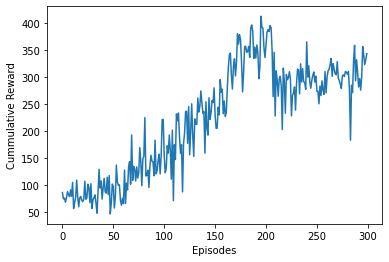

In [60]:
reward_plot(r)

In [61]:
r = [26.17500709607981, 31.005255410320267, 16.387355854859358, 36.86200145839781, 31.859306687166537, 25.573234627304334, 25.329113961574535, 22.81385152691912, 42.550724050834354, 29.304437858247365, 36.29878783486315, 25.544185759131423, 35.05066393616712, 31.295002022730998, 37.29584215435325, 31.540292653993816, 29.543400990340714, 31.54195803985283, 34.5411477729608, 36.0368350922916, 38.03996803394952, 20.536247045964927, 34.535837394455676, 27.786072853899157, 38.53449105180833, 34.53658760377097, 28.035266903931365, 38.28680898205831, 35.03574356670919, 23.282500193467367, 36.03479814796329, 25.03397736829729, 26.532630163117073, 30.28243561114467, 34.78087708472892, 38.286152697610035, 31.033807598899102, 27.280481233945363, 19.284532321683532, 24.533524651325013, 23.533146016793616, 36.286015400952145, 32.53406332695947, 10.28054665166646, 50.787754859882064, 24.279622374079633, 39.535626748697986, 31.78524222953838, 22.532699575014355, 44.03273350621263, 41.78517672532595, 26.28196867696609, 32.52937772091448, 27.53479291866728, 12.277222074931162, 28.03267954590817, 32.77925450654763, 21.285171576486714, 27.030820169577048, 32.78227281550899, 29.280594588422602, 32.283135841149395, 33.03320422791802, 39.78448113336396, 24.533992216604677, 20.53170688896619, 23.53117117618114, 33.031998226655695, 13.53103278893744, 17.028861220683595, 27.281385562198377, 25.28399886874107, 26.284016335540123, 48.78578028904915, 26.532475874461415, 27.281195778300592, 36.53605131682483, 34.785001585727386, 32.285432009755546, 24.783071420754776, 27.030274975235, 36.534096654615254, 41.53331181787463, 38.28368960781484, 24.78183703353844, 39.03270655466694, 41.5358939944815, 43.5348289840437, 33.28377944338903, 45.03041456437222, 38.53354910063988, 41.03547299862818, 25.2850745216601, 49.53117543123964, 30.784488591724866, 38.536112885361845, 38.78590845813764, 40.28387063934746, 70.53898437387456, 46.28574799006003, 37.283336399762284, 23.780683675066143, 25.284971795438267, 41.28831554872281, 40.7842967164754, 43.28278355185357, 32.78278151721929, 38.28671149634128, 32.53678874600038, 18.533048791809243, 37.534870439289094, 42.53818994743981, 36.03438899798078, 29.780927652868844, 23.530154006600103, 15.026935650885422, 29.278126075512493, 51.78339927126104, 46.28437213081953, 47.532307872614496, 33.03003402881496, 41.03232933620872, 28.282084548174296, 6.524260051679892, 5.27761766038259, 19.779099687904232, 33.03475834592944, 10.778183681658025, 21.530779891502565, 21.527094529073104, 30.02844551334858, 36.533329288717304, 29.52880730274709, 35.535935859191035, 50.535606520976145, 54.787158149402764, 29.027206505537958, 16.278501422930933, 3.7747687643746133, 15.028972128461199, 21.776881020211547, 28.530363935324477, 14.278916194141303, 6.278336457319317, 15.779898199064176, 4.026079958662294, 30.28237238212029, -3.722464374188529, 14.027594937501295, 1.5272819359751477, 4.281444455541348, 5.030088796122406, 20.534703244656814, 36.03666087558749, 35.536442135058, 14.531889616389709, 43.28506468527539, 45.28268291198517, 27.534117692744466, 33.53525435288084, 37.78278915718694, -0.7182492129258636, 11.031513762383005, 24.783767222759877, 17.531563970241468, 19.53201764763864, 44.78218326119358, 24.783093382311645, 8.784830497574157, 33.031616192983314, 21.28388378195073, 15.285863671760062, 2.7854624193281547, 43.28716495177458, 20.28715768342164, 29.28642221662697, 12.529791011019064, 15.783910523323414, 26.032998388256825, 30.289699133827217, 33.534025807152084, 32.533741673252806, 29.78532746788766, 46.536693602091994, 56.039128118567284, 49.79229604619453, 62.7914427105594, 41.785012231727606, 38.788938106707896, 29.041116222046917, 62.54235361833697, 56.7912563625866, 47.79274316239723, 58.53939824210697, 57.039840832623575, 46.539101366540116, 24.53179720441111, 50.040353416128276, 55.038653825756526, 50.28731135550372, 53.79104681184203, 43.28927625236392, 54.03986172960823, 50.78574447481795, 47.2844241264155, 59.286144845209336, 43.782656498900145, 31.03352255462906, 33.27961764246115, 41.77937575381285, 40.023514877974975, 35.52850376257058, 80.78930624724177, 68.53412193731646, 65.03141742493771, 61.52581084945491, 50.52139188840359, 40.26982201716498, 46.02106100399973, 33.52290479456832, 32.28036779069318, 43.27087071731361, 39.26992356695668, 61.28186233855942, 55.0415909259819, 39.53939774656166, 30.53164915042584, 10.773138497205087, 9.025116999455538, 2.525560396398118, 38.26877017169178, 49.26859578273254, 45.017833041811095, 44.51693510289524, 49.268265345750635, 68.79117092336723, 47.784292864071595, 59.79115243734591, 50.291757543946616, 50.041519265208336, 46.5401481017683, 51.541215790369236, 53.042744181963315, 48.29067945340061, 47.79032547140212, 65.79659169829951, 72.54856143568783, 74.04892449433345, 71.54829597975574, 67.79744841307395, 81.04108379277606, 98.79142595053139, 62.28997922582817, 92.28922705922989, 71.53486592488967, 95.79080929768139, 79.53831852020038, 73.53571208679385, 94.04066698443593, 69.04535169495463, 91.79280015892057, 95.04108084123453, 55.79340972221196, 77.53694312502834, 50.7763381412927, 90.78530266156164, 97.28686672642596, 81.28327752446572, 86.53406693622455, 80.78315804942285, 39.529049252626905, 35.27893796738679, 43.53508109818152, 54.286033385287894, 56.0392757136757, 93.79159497147496, 59.03043254700169, 27.539124251126935, 23.022830100376982, 7.269817988849029, 1.5190917982074887, 7.7722012147621395, 45.02475579748333, 63.53249987470109, 53.27865843907697, 57.28071683898358, 84.78677444494673, 76.78432298123597, 51.76893591313396, 83.29213261179201, 90.04262581344199, 99.03832129728073, 97.29175464819788, 84.28826720840244, 81.78839749970686, 77.28707371499836, 90.03825952542854, 70.29964690389335, 70.29841329848016, 76.79699759571514]

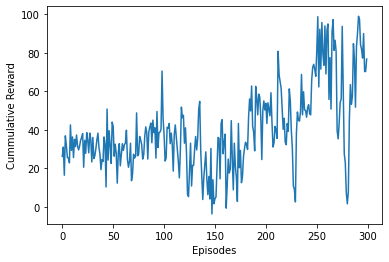

In [62]:
#7000
reward_plot(r)

In [63]:
# P = 600 | N = 2000
r = [27.984548356858692, 33.53522735365893, 28.26403295358319, 27.25593691744806, 25.827068291854417, 27.81699885589201, 27.321565975797377, 24.08940293808985, 40.564875181585, 37.08130863346547, 26.756734724554494, 28.145678155790225, 24.066147757702918, 27.79468179911838, 24.25478966949099, 41.28725319642255, 32.47678914493392, 33.7640653496517, 18.86892942179151, 27.040674690155573, 34.204727835759236, 17.79177264915082, 35.55126804636449, 21.52461385976019, 25.851410531196937, 18.336611408823785, 31.32909069897556, 18.95871417460222, 37.736519633345324, 22.073638402591264, 26.913238184218905, 33.54516339535482, 25.653232442074135, 46.91540129799305, 21.8189682049099, 36.359992580143086, 29.38797805503821, 29.80038021791173, 24.255617054291573, 33.811835514931516, 30.541140632837926, 23.231917853453773, 32.34463663846863, 25.11610964288051, 41.333169649905045, 22.47713224710775, 30.751878051410902, 44.46966513579488, 37.73639966395856, 18.96721658443956, 26.964974774386015, 43.23326816409641, 34.80201739389616, 48.8045887087212, 19.765000395736255, 27.44993521523405, 42.27043780853138, 42.94451980391305, 44.955525562123114, 23.851386081797735, 25.095790909332287, 44.92907026229732, 38.16301070406568, 46.433590239043546, 34.36589180720633, 31.845415334771815, 34.94345575294321, 44.72259129106523, 46.20133230553736, 41.38237608059898, 34.64649035236547, 49.291066917856206, 44.52296094620166, 30.800312924419664, 41.74420545492698, 35.11315263600456, 38.27601502776112, 33.649650769854695, 41.94412807732754, 35.51926911115665, 35.740164924254394, 41.628684964024025, 26.339391801580888, 41.96170436734168, 51.986569370656824, 53.9449246599453, 50.733906291165034, 53.4406617296215, 33.51837816554464, 49.26988240455241, 38.27580796227539, 56.1116931850394, 43.08110793510456, 40.56978473831413, 27.509629655510103, 50.55832878502783, 57.995904376056025, 27.132475339008664, 51.35126508998195, 37.74391317425871, 50.03796675559577, 49.69261883172706, 60.99056235569864, 42.474607274600466, 51.34465464219843, 35.96936169014325, 42.090270180809874, 43.89621470150993, 61.47099748013213, 59.582630415474156, 40.354578210494395, 40.78686832489136, 22.801549712758504, 15.787943039659377, 27.64154397041222, 31.882495386033455, 38.90096532851056, 26.825583211545187, 35.129326735194475, 53.14243270061785, 45.800114295617796, 42.48698499764592, 31.700698827728488, 43.50991476923597, 55.57086243207722, 48.88531641690514, 50.724594596203644, 63.32225151381263, 63.573488192745444, 53.246130353897975, 57.61590071501287, 55.14559890015798, 63.89788572060674, 62.69831928602113, 61.68625734546868, 62.914832577951586, 62.799664368361775, 64.24936762373815, 55.36172885099964, 44.80038424886719, 57.76668048885834, 47.77896977714878, 62.44781760336253, 59.83198985993864, 54.80519742165802, 52.4620789655192, 55.16587477025288, 57.510305676108246, 69.09327466434819, 72.82320317601085, 68.4598823616476, 63.57354767293627, 48.198103116627195, 58.70056315911516, 42.22411089491619, 33.98685151689842, 51.418553473348325, 31.435243530018663, 57.69422019867223, 48.16296708701237, 57.64930248075906, 33.71163813804434, 19.696037497572476, 39.189750498182725, 44.22143544946038, 24.193954119110863, 45.45971476517609, 33.67278421628961, 31.449105722214128, 60.87526784372891, 51.47297143900346, 39.883658339688125, 35.726847557943735, 52.462662244348124, 31.205597392996637, 36.45870134773288, 48.205725427255565, 24.66560576570295, 36.731410711693556, 52.19698364751355, 64.92365349090542, 49.828383895059375, 63.24983835037476, 60.356890440518356, 72.14127610167242, 54.22074157525747, 63.78362402673849, 69.63343848815607, 51.41602507425864, 50.28104568545526, 44.908557267258914, 39.87410395068129, 10.134552523842768, 46.692193332524425, 50.16103444139768, 46.27232836796237, 73.19235909585791, 60.43280907521909, 90.55333147811287, 86.91274393454057, 88.57281304121402, 92.03676124628002, 87.1875640276874, 84.82924503744871, 93.79639879466978, 93.50344565853288, 97.00344565853288, 87.0306462635362, 85.80502994930596, 85.06834103628475, 94.77939785601937, 91.27812603457468, 89.12180313244937, 91.56557700352548, 85.8039922471053, 94.80605590445603, 96.10463619416629, 82.07678534440414, 87.06151965762635, 86.56274977249475, 96.77188327140993, 87.07599022255235, 88.60174741060627, 94.29703274425496, 86.19847955483388, 92.06617503316868, 85.43699877856898, 88.10686563965487, 70.45771057633837, 88.4937337393998, 86.29576739342362, 66.94174172353289, 94.00242659059919, 57.46847177008499, 64.19475776166732, 83.09015951380528, 46.55907212436139, 78.93531971944908, 82.91891519674826, 63.801174414113795, 76.73690697716853, 82.10634829779592, 77.41778088392527, 77.05288602089102, 80.83827374546979, 83.82095191537243, 91.8285734329241, 93.08266762201885, 93.6795705064022, 87.65832523106096, 83.04792903054039, 91.7711096208057, 90.7828638171367, 90.62595768465034, 77.52873316721475, 90.34646798467527, 90.08431549303732, 90.58554670521441, 89.96918900331167, 94.35522136801407, 95.3243233036826, 91.32733035867965, 91.10024356831312, 78.33718979094398, 96.8017595574917, 81.28085662582549, 85.0, 86.3801831280573, 89.27405210392301, 84.91344646785616, 91.56281528934474, 79.87527148322971, 95.30402474359651, 95.15342329933917, 82.27897881846685, 89.3157784190451, 82.8978460483626, 81.829001929524, 94.29951714808118, 82.60858060232766, 66.86577118189788, 90.56485733900806, 94.26751467737975, 87.06890282433636, 91.32933440468705, 98.76812685383712, 93.51445029319804, 92.86344456378562, 82.43367726254925, 63.20668834153493, 86.3699843082376, 91.05107399411118, 94.08384328525312, 84.8886171384665, 94.59272785018626, 76.03749104664128, 95.94894555363516, 94.033297213773, 91.16166164280382, 95.05010328264953]

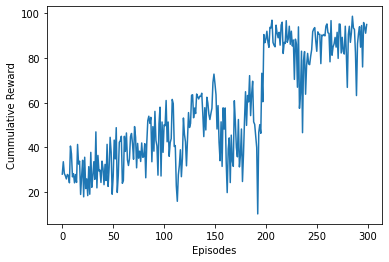

In [64]:
reward_plot(r)

In [66]:
r = [21.09858217555199, 31.632193404231504, 32.13811389244981, 24.4527251717011, 26.871281597142623, 32.892658248097156, 16.620882761039194, 23.463956661362047, 15.89424672059453, 32.43388350871814, 22.63717608015463, 29.652098185448736, 31.417269394103727, 35.65339419553536, 32.6727662332614, 28.854108583531424, 26.182478297474432, 30.632614810729184, 36.84534359567361, 36.88287026427587, 45.94836761793886, 34.6349104170623, 35.131266437462195, 22.140346075672447, 19.639447274859627, 13.413468695071646, 40.097607819327905, 18.856735375686913, 27.909607884826237, 31.419316867355086, 25.357965942633353, 28.906265001544295, 39.696767349409704, 28.459994818775755, 25.148733223293895, 29.900966278463617, 34.35105172419923, 33.86472716509944, 37.16521237723771, 21.391963976595648, 33.62344372209455, 27.370836122516746, 24.355949346084444, 27.665679234528298, 31.083571787069282, 38.88067282401403, 29.37657489368092, 27.661261310019427, 42.633242800253356, 39.63440301748911, 22.434093666460953, 41.20394379134013, 28.0953073407015, 28.6274672499489, 27.080731476893334, 43.619657231287434, 26.63113632880955, 31.151843580171974, 21.85820594572721, 29.453679780438655, 23.45590869944959, 37.62995293491824, 34.11113178068575, 30.09991054029192, 24.132938625184625, 42.61801581818818, 41.67938433584455, 32.895880051952766, 34.37624917190121, 35.38120171042916, 36.701226344459585, 33.601681953883826, 40.69416716550305, 41.15287821318047, 21.91036370823708, 35.34748357891501, 25.374859726827978, 30.90370743967687, 38.379137390576304, 26.4193894506887, 38.64319495405925, 30.347252417729838, 32.37068320189424, 37.355666863457245, 35.34231627048469, 44.85450579905316, 50.09216865655216, 35.375264696074474, 37.114003862743346, 45.32105555076078, 26.585501703845008, 44.34871991550139, 39.85015415878354, 34.862731093907136, 36.32638628762032, 43.86138853106331, 40.16013968306, 30.628663823906844, 32.43178647670097, 21.13976208123179, 38.858440605622796, 32.56966190718647, 26.10652569848735, 23.654592699285917, 44.873838978052355, 31.825039480744554, 34.3604610183565, 36.572825007222676, 44.588004747725044, 38.83638814174872, 25.918005275391103, 37.11943917882218, 27.164541358580696, 45.87575142460577, 21.859128377514512, 36.08215779992279, 34.62226811160711, 32.63906234331158, 22.846500998961503, 30.85547288160398, 46.078553543904434, 63.6162738718317, 70.60173591971187, 50.12071875268631, 60.07797860033157, 44.55148701017182, 47.647388322821364, 49.42683041373267, 27.353990594534107, 52.875182139034415, 51.679025134855166, 44.64742652682901, 48.125995695105274, 62.133654326399736, 41.142536225569685, 43.65490301431692, 60.36115760973126, 39.810988560927115, 26.901363701811153, 36.851894234125915, 48.37850480421648, 36.60218805446412, 28.59862665639794, 45.89904946593901, 67.84556207190705, 56.332824275910625, 38.401284544987746, 51.33517619790612, 54.354080153679924, 42.361188368695785, 32.861789770326126, 49.14601305460506, 48.8211677882714, 32.10075508718717, 39.60231137224575, 32.879085464796745, 43.40592194586021, 34.84062055827714, 52.6112517119318, 55.085157130455194, 54.87882308380578, 43.82730084325517, 27.129581785277892, 41.09225057587599, 49.85893821603598, 58.57962016387228, 49.852232082287486, 18.69069084081889, 39.931728295078024, 37.3522659102855, 39.39756198806016, 24.93640706746869, 53.84684660341326, 45.36987872360292, 38.33376169166104, 17.799092104730658, 48.54297327320046, 67.1264351386943, 48.81719135309502, 50.54691724597838, 64.57613138410983, 63.038482901183606, 58.798194033665716, 60.070767132773675, 53.31445709497316, 46.557065137244564, 37.868054513952906, 61.06468303847478, 28.833979572091504, 57.81011444148094, 51.11931455149223, 46.57296868594796, 66.55582329445096, 49.0762287597229, 44.078984858087885, 50.645546940089694, 74.56220539701201, 50.3422042666613, 71.37298996471526, 55.57389349490547, 52.86931391646901, 49.584194078383725, 69.31113711003046, 75.36412226060148, 60.956837204292604, 40.39317957431552, 13.39803965461044, 40.82034871774165, 5.824035139169842, 14.386091543290313, 22.76855174261221, 4.453023675965239, 26.228274067091235, 8.052712774809699, 13.844273143501441, 1.0808236502207906, 14.7883942061252, 23.165683917843506, -0.19257099483466933, 29.700811871134697, 19.817497559193626, 25.39312546194809, -11.00582566878377, 14.599984745887888, 35.94490492445295, 73.9181227406433, 43.57851455176367, 65.89576450224683, 62.07957963614756, 71.3462085010431, 76.0724335586794, 70.3426205377465, 78.02791338920218, 80.82040036678454, 59.63634263169776, 72.07830078636779, 84.55508938131382, 82.27427793282023, 89.8023302550666, 90.27603296568785, 84.04424547746815, 78.0861669673008, 86.32412788830287, 64.61089007488212, 93.81354413976769, 93.55169438276093, 92.0373109852786, 91.79868391485181, 92.03293582540641, 84.27627999790386, 84.52372577579447, 92.27219784070503, 93.00492674852666, 91.27493896703977, 92.2795893380391, 86.75933804239496, 92.2730488697089, 88.03753675617698, 92.27320297129693, 95.25941203344257, 92.02749073397705, 95.75790242413588, 92.78256640486433, 92.28543084808204, 73.09445393645929, 95.32607544042705, 89.5098414355463, 95.76868922811056, 95.52633128075888, 97.29765416741083, 92.0111897872734, 95.51587924210175, 95.00438985847737, 97.5, 93.02175188504638, 97.25743543339462, 91.00649260993917, 94.26704506613225, 93.02067513508666, 94.77798917664137, 94.27707386778778, 95.26778175838764, 92.77797841523692, 95.76479918097219, 91.50343659282451, 94.00591625506856, 94.7699352218131, 95.75143510372946, 93.51556339617215, 90.52664072177734, 98.76620599641078, 87.01184534353325, 94.01464043174919, 95.53030627296606, 86.00708166790633, 92.75, 93.01014144261543, 98.5, 93.2599388755022, 90.2520052377606]

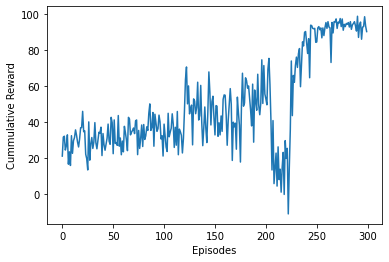

In [67]:
# P = 600 | N = 3000
reward_plot(r)

In [71]:
r = [33.37165854640642, 28.44528642701842, 38.88074169620734, 33.07237842991331, 43.02330051580329, 23.761907818537978, 22.462169451380266, 28.24331664694649, 32.086202645720164, 34.47966217189223, 32.181737048949145, 35.0460235569001, 37.20905696611913, 24.30071483418551, 33.9290441493779, 24.14714104346677, 21.987583805747676, 27.6502662014654, 22.03930278116684, 37.50495105895896, 34.235859024922235, 34.37637357331418, 14.445503688957121, 31.57902522267252, 37.81632157568259, 19.628582843422006, 37.39133655431191, 34.42397710854617, 27.463753052225023, 19.536938734996124, 35.656362263769815, 36.134942811425404, 25.023586455289628, 31.758124422167352, 33.90560535914096, 23.927834057043867, 35.45486661693931, 27.562784894478085, 33.426929086477934, 30.889951313656717, 12.43931267762601, 21.406991143658235, 39.3031882611252, 26.356514539781035, 37.87477625787265, 16.379658389574526, 40.04463442565397, 32.72877307240762, 42.38704031697244, 32.4507125028574, 36.076905468724256, 18.428036327632594, 28.20384519168688, 21.64045403262697, 25.120344510810565, 23.473574992597698, 29.281711006056025, 48.16395294239763, 32.51419493477351, 33.069398731878174, 36.73297745961971, 21.63833679944855, 35.350128708010985, 26.614916988327636, 35.83426297429287, 38.4040231149293, 49.775405528569365, 31.17175385418614, 25.119874883334106, 25.70809210739632, 33.88764647638003, 30.463467434495648, 25.83446822351949, 24.01405688281636, 26.116963487380676, 32.78319562171019, 41.61764155031096, 49.700261877589135, 33.74308717767351, 21.249367430930786, 26.010696304382645, 36.53386992342137, 39.630694074532656, 24.924263167397342, 34.74955909414108, 17.08062479457872, 14.720287914227791, 37.33280027914457, 25.96495758273719, 19.427277861156284, 16.784970605834598, 31.176866498891265, 29.36977392183224, 20.559171259869228, 25.974454377535636, 33.65595478246702, 26.265553595448296, 40.478344357585094, 31.42878640888885, 30.331884748513758, 32.498040012586046, 33.94760444272388, 36.01637657841882, 33.95731835505343, 37.06680797372574, 33.25578501768731, 22.348865845012885, 8.157689400241493, 18.11589031735815, 16.535200578105318, 32.442315161646285, 32.66170594989626, 14.092346052048494, 48.2412868453359, 38.04160084126146, 46.71673279961671, 42.153039008930115, 48.23893945012421, 39.36442763897392, 42.477651484766824, 44.77590102055918, 36.93145263642056, 30.640073249378084, 44.64469361091242, 57.305974692853205, 43.15196032886096, 20.112621324374516, 10.615766402778457, 4.050922241687632, -6.937895802407969, 16.195757300072025, 25.002436690637666, -3.5177435215434985, -3.9101677958315246, 51.09655448150592, 79.03408150074623, 86.73254001508651, 75.38540104872675, 80.32477389488547, 71.18419672511567, 79.91575841118322, 81.03830336800185, 91.21521682906868, 90.32421659390337, 90.55596044322029, 82.51804154025213, 87.57417646882, 87.74390092186837, 82.41819941542133, 85.2830510290581, 83.40487845312268, 75.581961185947, 88.76079027027481, 84.80010876571221, 91.66464014717216, 85.53734889332627, 87.27119614504329, 89.81905826598712, 89.50134931855918, 85.8698691176711, 81.9753538905303, 99.47964085289873, 91.05619593436636, 89.22225800717028, 94.10492483329793, 84.70681759843094, 95.34295893198752, 91.37051285661806, 84.0323708624577, 95.95983957848608, 94.2493144054756, 77.5367605880373, 86.24155113935149, 85.37359187054453, 86.32729800342372, 94.05183823903862, 81.31715562793515, 88.63614584082558, 83.83732232226158, 86.6376778667751, 96.17850741500114, 89.15950468672122, 95.7623037258689, 84.03902560933777, 86.68307886461574, 97.89832091810918, 87.568067783091, 95.27749412884266, 92.74544167590018, 92.13208971453321, 86.11969570237486, 92.82662619417687, 83.91147738702344, 92.70231308690099, 96.88109378399865, 92.73788878289251, 93.15390084950138, 89.25729273426467, 93.01556020801878, 92.7967608673399, 97.98773932279738, 98.54318824462277, 86.13404205998589, 91.53053462886692, 94.43188410278505, 95.43361607413473, 89.96641757906781, 98.9828226999839, 94.49668398054479, 95.89047655226626, 88.55086447899379, 94.51079543485406, 92.67433856924045, 92.34838576144062, 97.47589199187045, 96.05188005743848, 92.47991301180248, 94.71588040157867, 96.54240302848972, 94.05115351488851, 95.06335481880527, 95.88141381470913, 94.54692378121118, 97.34059486568916, 98.3853348447167, 98.3287851057613, 91.62140595782353, 100.80359410337033, 96.41887926564354, 96.34873629554882, 91.49404898075682, 96.9472329319433, 97.13432936612591, 93.9846869572594, 97.53068078078022, 97.29604572977422, 94.97706682672069, 90.16151085175746, 96.53079177811634, 91.15678410984866, 97.55547963555284, 97.36647230141327, 95.75783744157492, 93.60268401952663, 90.42221587497626, 97.64360626463227, 91.54992948960741, 96.63446647748812, 97.50882914663441, 96.4881635162751, 95.66625868015133, 94.75024985305075, 91.91906506029486, 87.75119641174904, 100.04724779869046, 99.5007933392024, 96.76209396229193, 99.04567147411747, 93.42616757492708, 97.97621241759659, 92.40968719250023, 96.55501959906458, 99.87300679945182, 96.05109180007108, 92.84494250711607, 96.95950646037029, 94.51780750925157, 96.25063665569418, 93.2224838521014, 82.41156760961017, 97.20556462694906, 97.49245879606244, 99.49876210510035, 101.02756869268558, 69.97166637293255, 100.20454965359728, 99.02703878924864, 97.07089251571827, 97.15153500895356, 96.32235694929982, 98.93190266702145, 95.63045973109979, 82.88317321885671, 93.69599951977763, 100.35964487451682, 94.48180108987997, 98.92473277046325, 94.3004481998175, 101.07812468588452, 99.42533314106524, 99.47460246508996, 100.56555171715976, 101.07317414585032, 101.0262505084119, 96.92964364478843, 92.70558019056298, 98.85988831990774, 99.09167126167814, 99.38249368104702, 98.46140480570763]

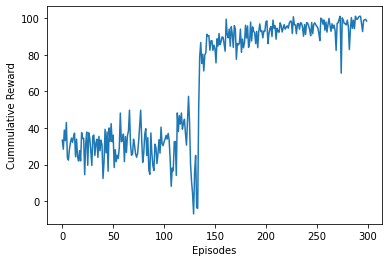

In [72]:
reward_plot(r)